In [1]:
from pathlib import Path
import pandas as pd
from typing import List, Tuple
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
FIGSIZE = (13, 8)
DPI = 200
plt.style.use("ggplot")

PRECISION_KEY = "Precision_edit_dist"
RECALL_KEY = "Recall_edit_dist"
BETA = 0.25  # recall is beta times as important as precision
MAX_COVG = 0

In [2]:
def f1_score(precision: float, recall: float) -> float:
    return f_score(precision, recall, beta=1.0)

def f_score(precision: float, recall: float, beta: float = 1.0) -> float:
    """A more general F score, F beta, that uses a positive real factor beta, 
    where beta is chosen such that recall is considered beta times as 
    important as precision.
    Setting to 1 gives the f1 score
    Taken from https://en.wikipedia.org/wiki/F-score
    """
    b2 = beta**2
    return (1 + b2) * ((precision * recall) / ((b2 * precision) + recall))

def data_for_variants(directory: str) -> pd.DataFrame:
    json_files = list(Path(directory).rglob("*.json"))

    print(len(json_files))

    data: List[Tuple[str, str, str, float, float]] = []
    columns = ["sample", "tool", "precision", "recall", "false_negs", "fps", "f1", "fbeta"]
    for p in json_files:
        d = json.loads(p.read_text())
        sample = p.parts[2]
        tool = p.parts[1]
        precision = float(d["Precision"][PRECISION_KEY])
        recall = float(d["Recall"][RECALL_KEY])
        fns = int(d["Recall"]["FN"]["Count"])
        fps = int(d["Precision"]["FP"]["Count"])
        f1 = f1_score(precision, recall)
        fbeta = f_score(precision, recall, BETA)
        data.append((sample, tool, precision, recall, fns, fps, f1, fbeta))
    return pd.DataFrame(data, columns=columns)

In [3]:
df = data_for_variants("varifier_jsons/")

168


In [4]:
df.groupby(["tool"]).describe()[["precision", "recall"]]

precision            \
                                                     count      mean   
tool                                                                   
compass                                                7.0  0.999455   
nofilters                                              7.0  0.973338   
q60                                                    7.0  0.995849   
q60r0.05G-0.5V0.002                                    7.0  0.997505   
q60r0.05G-0.5V0.002K0.9                                7.0  0.998926   
v110                                                   7.0  0.999107   
v113-I-q60                                             7.0  0.979626   
v113-I-q60K75                                          7.0  0.982634   
v113-I-q60K75V0.0002                                   7.0  0.993374   
v113-I-q60K75V0.002G-0.6d8                             7.0  0.998560   
v113-M500kI-q60K75V0.002G-0.6d8                        7.0  0.998166   
v113-custom                                            7.0  0.959057   
v113-custom-d4sb1K0.55w-2.6W3C2.2G-0.65                7.0  0.984560   
v113-custom-d4sb1K0.55w-2.6W3C2.2G-0.65V0.004          7.0  0.996501   
v113-custom-d4sb1K0.55w-2.6W3C2.2G-0.65V0.004M56       7.0  0.996954   
v113-custom-d4sb1K0.5w-2.6W3C2.2                       7.0  0.973886   
v113-custom-d4sb1K0.5w-2.6W3C2.2G-0.6                  7.0  0.977373   
v113-custom-d4sb1K0.5w-2.6W3C2.2G-0.65                 7.0  0.982741   
v113-custom-d4sb1K0.65w-2.6W3C2.2G-0.65V0.004M56       7.0  0.998536   
v113-custom-d4sb1K0.65w-2.6W3C2.2G-0.65V0.004M57       7.0  0.998534   
v113-custom9                                           7.0  0.992719   
v113-default-ont                                       7.0  0.941721   
v113-old-filters                                       7.0  0.999110   
v113-q30K70sb2d3D200w-3W3.5C1.9G-0.5                   7.0  0.978405   

                                                                      \
                                                       std       min   
tool                                                                   
compass                                           0.001441  0.996188   
nofilters                                         0.012076  0.955044   
q60                                               0.005228  0.984936   
q60r0.05G-0.5V0.002                               0.002518  0.994186   
q60r0.05G-0.5V0.002K0.9                           0.001833  0.994872   
v110                                              0.001370  0.996139   
v113-I-q60                                        0.027136  0.927138   
v113-I-q60K75                                     0.025352  0.932755   
v113-I-q60K75V0.0002                              0.008935  0.977750   
v113-I-q60K75V0.002G-0.6d8                        0.001832  0.996149   
v113-M500kI-q60K75V0.002G-0.6d8                   0.002327  0.994876   
v113-custom                                       0.034756  0.901961   
v113-custom-d4sb1K0.55w-2.6W3C2.2G-0.65           0.021166  0.943601   
v113-custom-d4sb1K0.55w-2.6W3C2.2G-0.65V0.004     0.003528  0.989482   
v113-custom-d4sb1K0.55w-2.6W3C2.2G-0.65V0.004M56  0.002529  0.992695   
v113-custom-d4sb1K0.5w-2.6W3C2.2                  0.028726  0.929735   
v113-custom-d4sb1K0.5w-2.6W3C2.2G-0.6             0.027228  0.928118   
v113-custom-d4sb1K0.5w-2.6W3C2.2G-0.65            0.021359  0.941558   
v113-custom-d4sb1K0.65w-2.6W3C2.2G-0.65V0.004M56  0.001257  0.996198   
v113-custom-d4sb1K0.65w-2.6W3C2.2G-0.65V0.004M57  0.001257  0.996198   
v113-custom9                                      0.010784  0.971640   
v113-default-ont                                  0.037889  0.891142   
v113-old-filters                                  0.002355  0.993769   
v113-q30K70sb2d3D200w-3W3.5C1.9G-0.5              0.026487  0.934307   

                                                                      \
                                                       25%       50%   
tool           

In [5]:
x = "tool"
y = "recall"
fixed_labels = ["compass", "nofilters"]
order = [*fixed_labels, *[label for label in sorted(df[x].unique()) if label not in fixed_labels]]
fig, ax = plt.subplots(figsize=FIGSIZE, dpi=DPI)
# sns.boxplot(x=x, y=y, data=df, ax=ax, order=order)
sns.boxenplot(x=x, y=y, data=df, ax=ax, order=order, k_depth="full")
sns.stripplot(x=x, y=y, dodge=True, data=df, ax=ax, color="black", order=order)
ax.set(title=y.capitalize(), xlabel="variant caller")
ax.set_ylabel("recall/sensitivity/TPR")
# ax.set_xticklabels(["COMPASS", "bcftools-ONT", "pandora-ONT"])
ax.set(ylim=(0.70, 0.95))
_ = plt.xticks(rotation=90)
# plt.legend(loc='lower left')
# fig.savefig(snakemake.output.recall_plot)

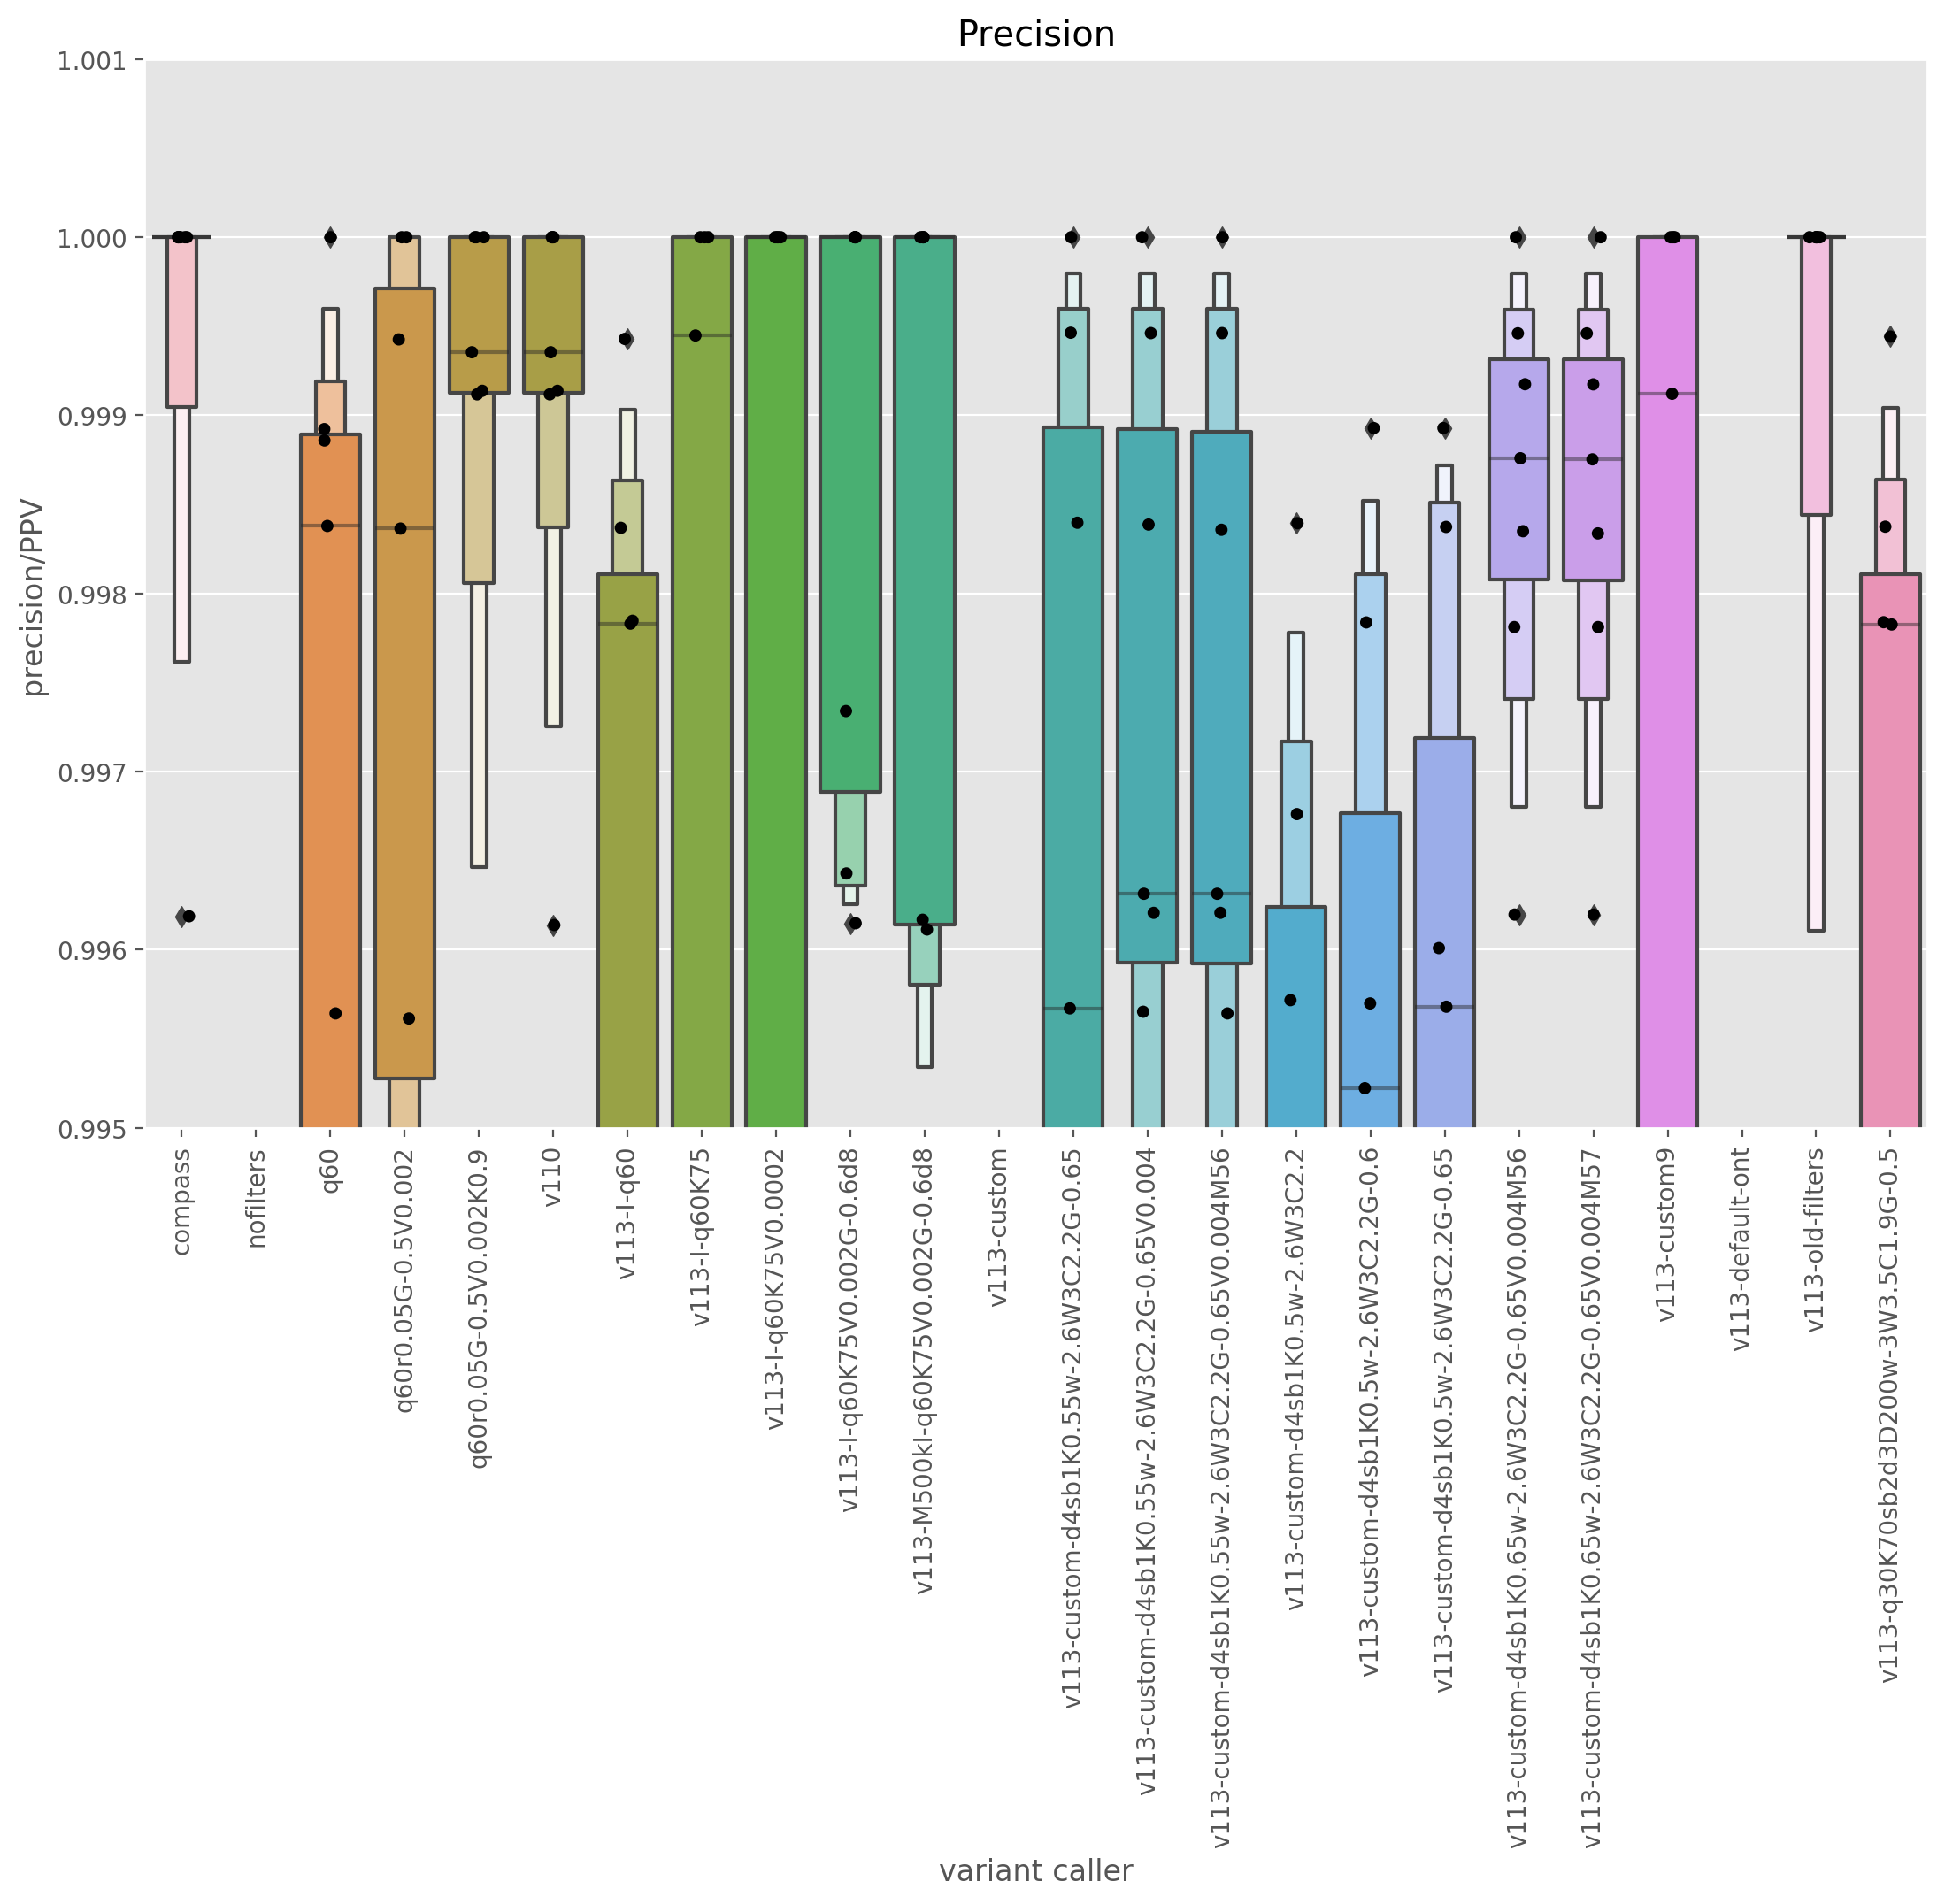

In [6]:
x = "tool"
y = "precision"
fixed_labels = ["compass"]
order = [*fixed_labels, *[label for label in sorted(df[x].unique()) if label not in fixed_labels]]
fig, ax = plt.subplots(figsize=FIGSIZE, dpi=DPI)
# sns.boxplot(x=x, y=y, data=df, ax=ax, order=order)
sns.boxenplot(x=x, y=y, data=df, ax=ax, order=order, k_depth="full")
sns.stripplot(x=x, y=y, dodge=True, data=df, ax=ax, color="black", order=order)
ax.set(title=y.capitalize(), xlabel="variant caller")
ax.set_ylabel("precision/PPV")
# ax.set_xticklabels(["COMPASS", "bcftools-ONT", "pandora-ONT"])
ax.set(ylim=(0.995, 1.001))
_ = plt.xticks(rotation=90)
# plt.legend(loc='lower left')
# fig.savefig(snakemake.output.recall_plot)

Text(0, 0, 'variant caller')

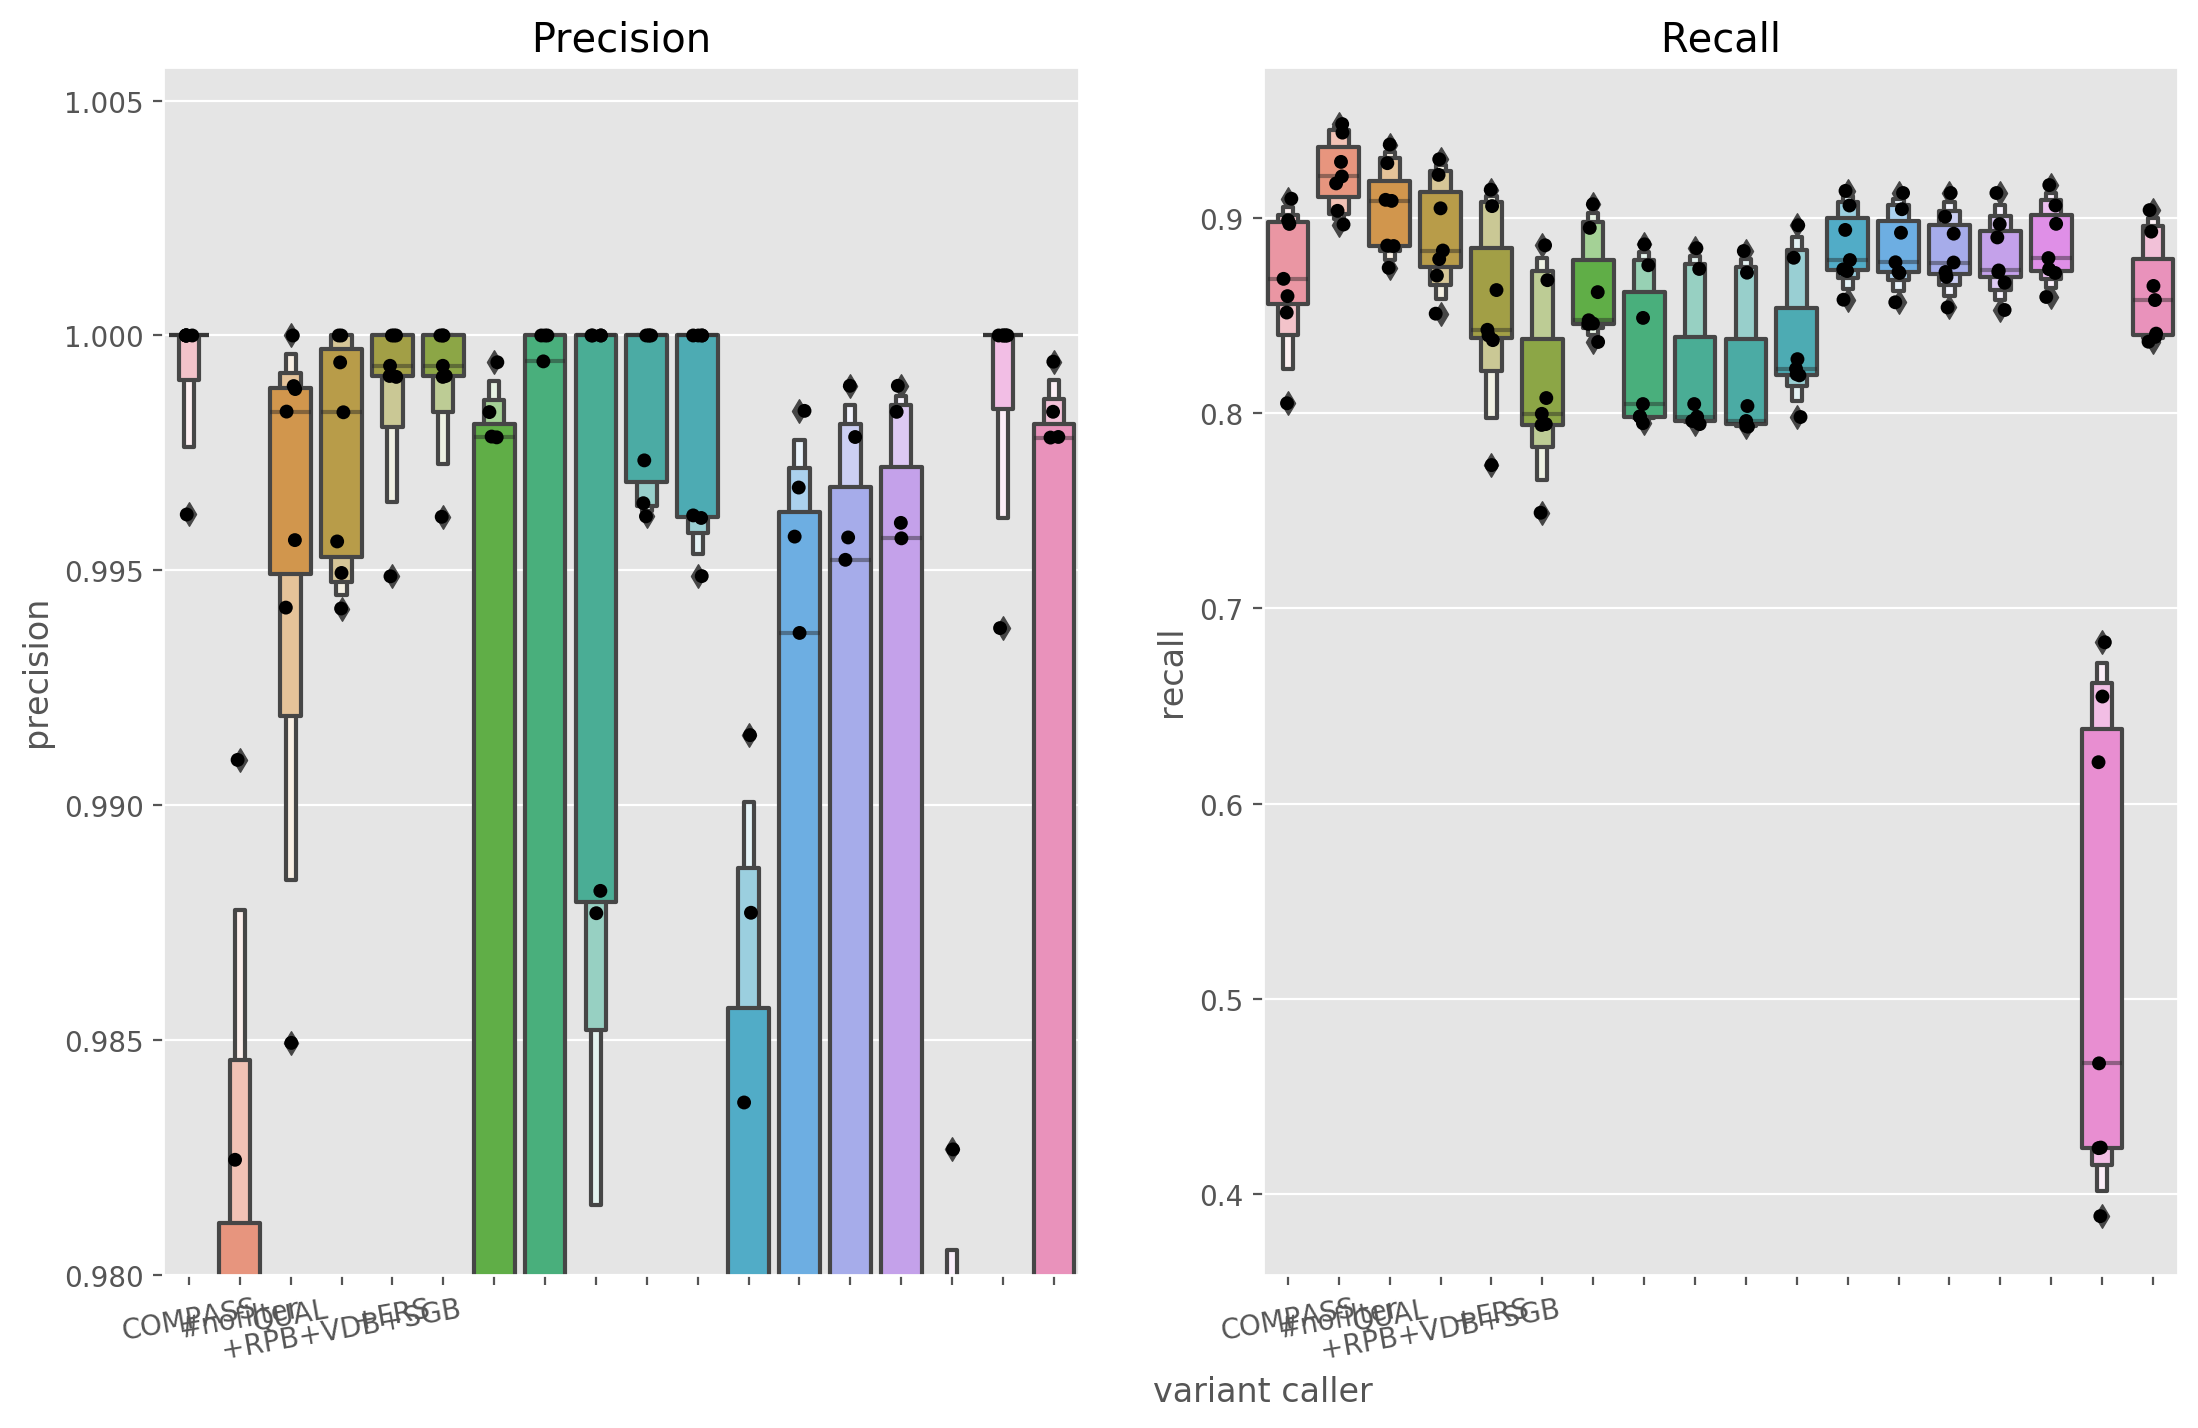

In [460]:
fig, axes = plt.subplots(ncols=2, figsize=FIGSIZE, dpi=DPI, sharey=False, sharex=True)
x = "tool"
for ax, y in zip(axes.flatten(), ["precision", "recall"]):
    sns.boxenplot(x=x, y=y, data=df, ax=ax, k_depth="full", order=order)
    sns.stripplot(x=x, y=y, dodge=True, data=df, ax=ax, color="black", order=order)
    ax.set(title=y.capitalize())
    ax.set_xlabel("")
    if y == "precision":
        ax.set_ylim(ymin=0.98)
    ax.tick_params("x", labelrotation=10)
    ax.set_xticklabels(["COMPASS", "#nofilter", "QUAL", "+RPB+VDB+SGB", "+FRS"])
    # plt.legend(loc='lower left')
    # fig.savefig(snakemake.output.recall_plot)
# fig.tight_layout()
plt.xlabel("variant caller", x=0, ha="center")

In [14]:
from dataclasses import dataclass
from typing import Tuple, NamedTuple, Optional, List

In [15]:
class Genotype(NamedTuple):
    allele1: int
    allele2: int

    def is_null(self) -> bool:
        """Is the genotype null. i.e. ./."""
        return self.allele1 == -1 and self.allele2 == -1

    def is_hom(self) -> bool:
        """Is the genotype homozygous"""
        if self.is_null():
            return False
        if self.allele1 == -1 or self.allele2 == -1:
            return True
        return self.allele1 == self.allele2

    def is_het(self) -> bool:
        """Is the genotype heterozyhous"""
        return not self.is_null() and not self.is_hom()

    def is_hom_ref(self) -> bool:
        """Is genotype homozygous reference?"""
        return self.is_hom() and (self.allele1 == 0 or self.allele2 == 0)

    def is_hom_alt(self) -> bool:
        """Is genotype homozygous alternate?"""
        return self.is_hom() and (self.allele1 > 0 or self.allele2 > 0)

    def alt_index(self) -> Optional[int]:
        """If the genotype is homozygous alternate, returns the 0-based index of the
        alt allele in the alternate allele array.
        """
        if not self.is_hom_alt():
            return None
        return max(self.allele1, self.allele2) - 1

    def allele_index(self) -> Optional[int]:
        """The index of the called allele"""
        if self.is_hom_ref() or self.is_null():
            return 0
        elif self.is_hom_alt():
            return self.alt_index() + 1
        else:
            raise NotImplementedError(f"Het Genotype is unexpected: {self}")

    @staticmethod
    def from_arr(arr: List[int]) -> "Genotype":
        alleles = [a for a in arr if type(a) is int]
        if len(alleles) < 2:
            alleles.append(-1)
        return Genotype(*alleles)

@dataclass
class StrandDepths:
    ref_forward: int = 0
    ref_reverse: int = 0
    alt_forward: int = 0
    alt_reverse: int = 0

    @staticmethod
    def _ratio(depths: Tuple[int, int]) -> float:
        try:
            return min(depths) / sum(depths)
        except ZeroDivisionError:
            return 1.0

    @property
    def ref_depths(self) -> Tuple[int, int]:
        return self.ref_forward, self.ref_reverse

    @property
    def alt_depths(self) -> Tuple[int, int]:
        return self.alt_forward, self.alt_reverse

    @property
    def ref_ratio(self) -> float:
        return self._ratio(self.ref_depths)

    @property
    def alt_ratio(self) -> float:
        return self._ratio(self.alt_depths)

    def to_tuple(self) -> Tuple[int, int, int, int]:
        return self.ref_forward, self.ref_reverse, self.alt_forward, self.alt_reverse

def fraction_read_support(variant) -> float:
    strand_depths = get_strand_depths(variant)
    if strand_depths is None:
        return 1.0
    total_covg = sum(strand_depths.to_tuple())
    called_idx = Genotype.from_arr(variant.genotypes[0]).allele_index()
    if called_idx == 0:  # ref
        called_covg = sum(strand_depths.ref_depths)
    else:
        called_covg = sum(strand_depths.alt_depths)
    try:
        return called_covg / total_covg
    except ZeroDivisionError:
        return 1.0
    
def get_strand_depths(
    variant, default = None
) -> StrandDepths:
    strand_depths = variant.INFO.get("DP4", None)
    return StrandDepths(*strand_depths) if strand_depths is not None else default

def strand_bias(variant) -> float:
        strand_depths = get_strand_depths(variant)
        assert strand_depths is not None, (
            f"Strand bias filter should be turned off if no DP4 "
            f"tag is present."
        )

        gt = Genotype.from_arr(variant.genotypes[0])
        if gt.is_hom_alt():
            ratio = strand_depths.alt_ratio
        elif gt.is_hom_ref():
            ratio = strand_depths.ref_ratio
        elif gt.is_het():
            ratio = min(strand_depths.ref_ratio, strand_depths.alt_ratio)
        elif gt.is_null():
            ratio = float("inf")
        else:
            raise NotImplementedError(
                f"Don't know how to interpret genotype {gt} for variant at "
                f"POS {variant.POS}"
            )
        return ratio

In [604]:
precision_vcfs = list(Path("varifier_jsons/v113-custom-d4sb1K0.65w-2.6W3C2.2G-0.65V0.004M56/").rglob("*.vcf"))

In [605]:
from cyvcf2 import VCF

In [606]:
info = ["BQBZ", "DP", "FS", "MQ", "MQ0F", "RPBZ", "SCBZ", "SGB", "VDB", "MQBZ"]

In [659]:
data = []
for p in precision_vcfs:
    sample = p.parts[-3]
    for r in VCF(p):
        result = "TP" in r.format("VFR_RESULT")[0]
        data.append((sample, result, "QUAL", r.QUAL or 0, r.POS))
        frs = fraction_read_support(r)
        data.append((sample, result, "FRS", frs, r.POS))
        sb = strand_bias(r)
        data.append((sample, result, "SB", sb, r.POS))
        for k in info:
            try:
                data.append((sample, result, k, r.INFO[k], r.POS))
            except KeyError:
                continue

In [660]:
df = pd.DataFrame(data, columns=["sample", "is_tp", "field", "value", "POS"])

Text(0.5, 1.0, 'QUAL')

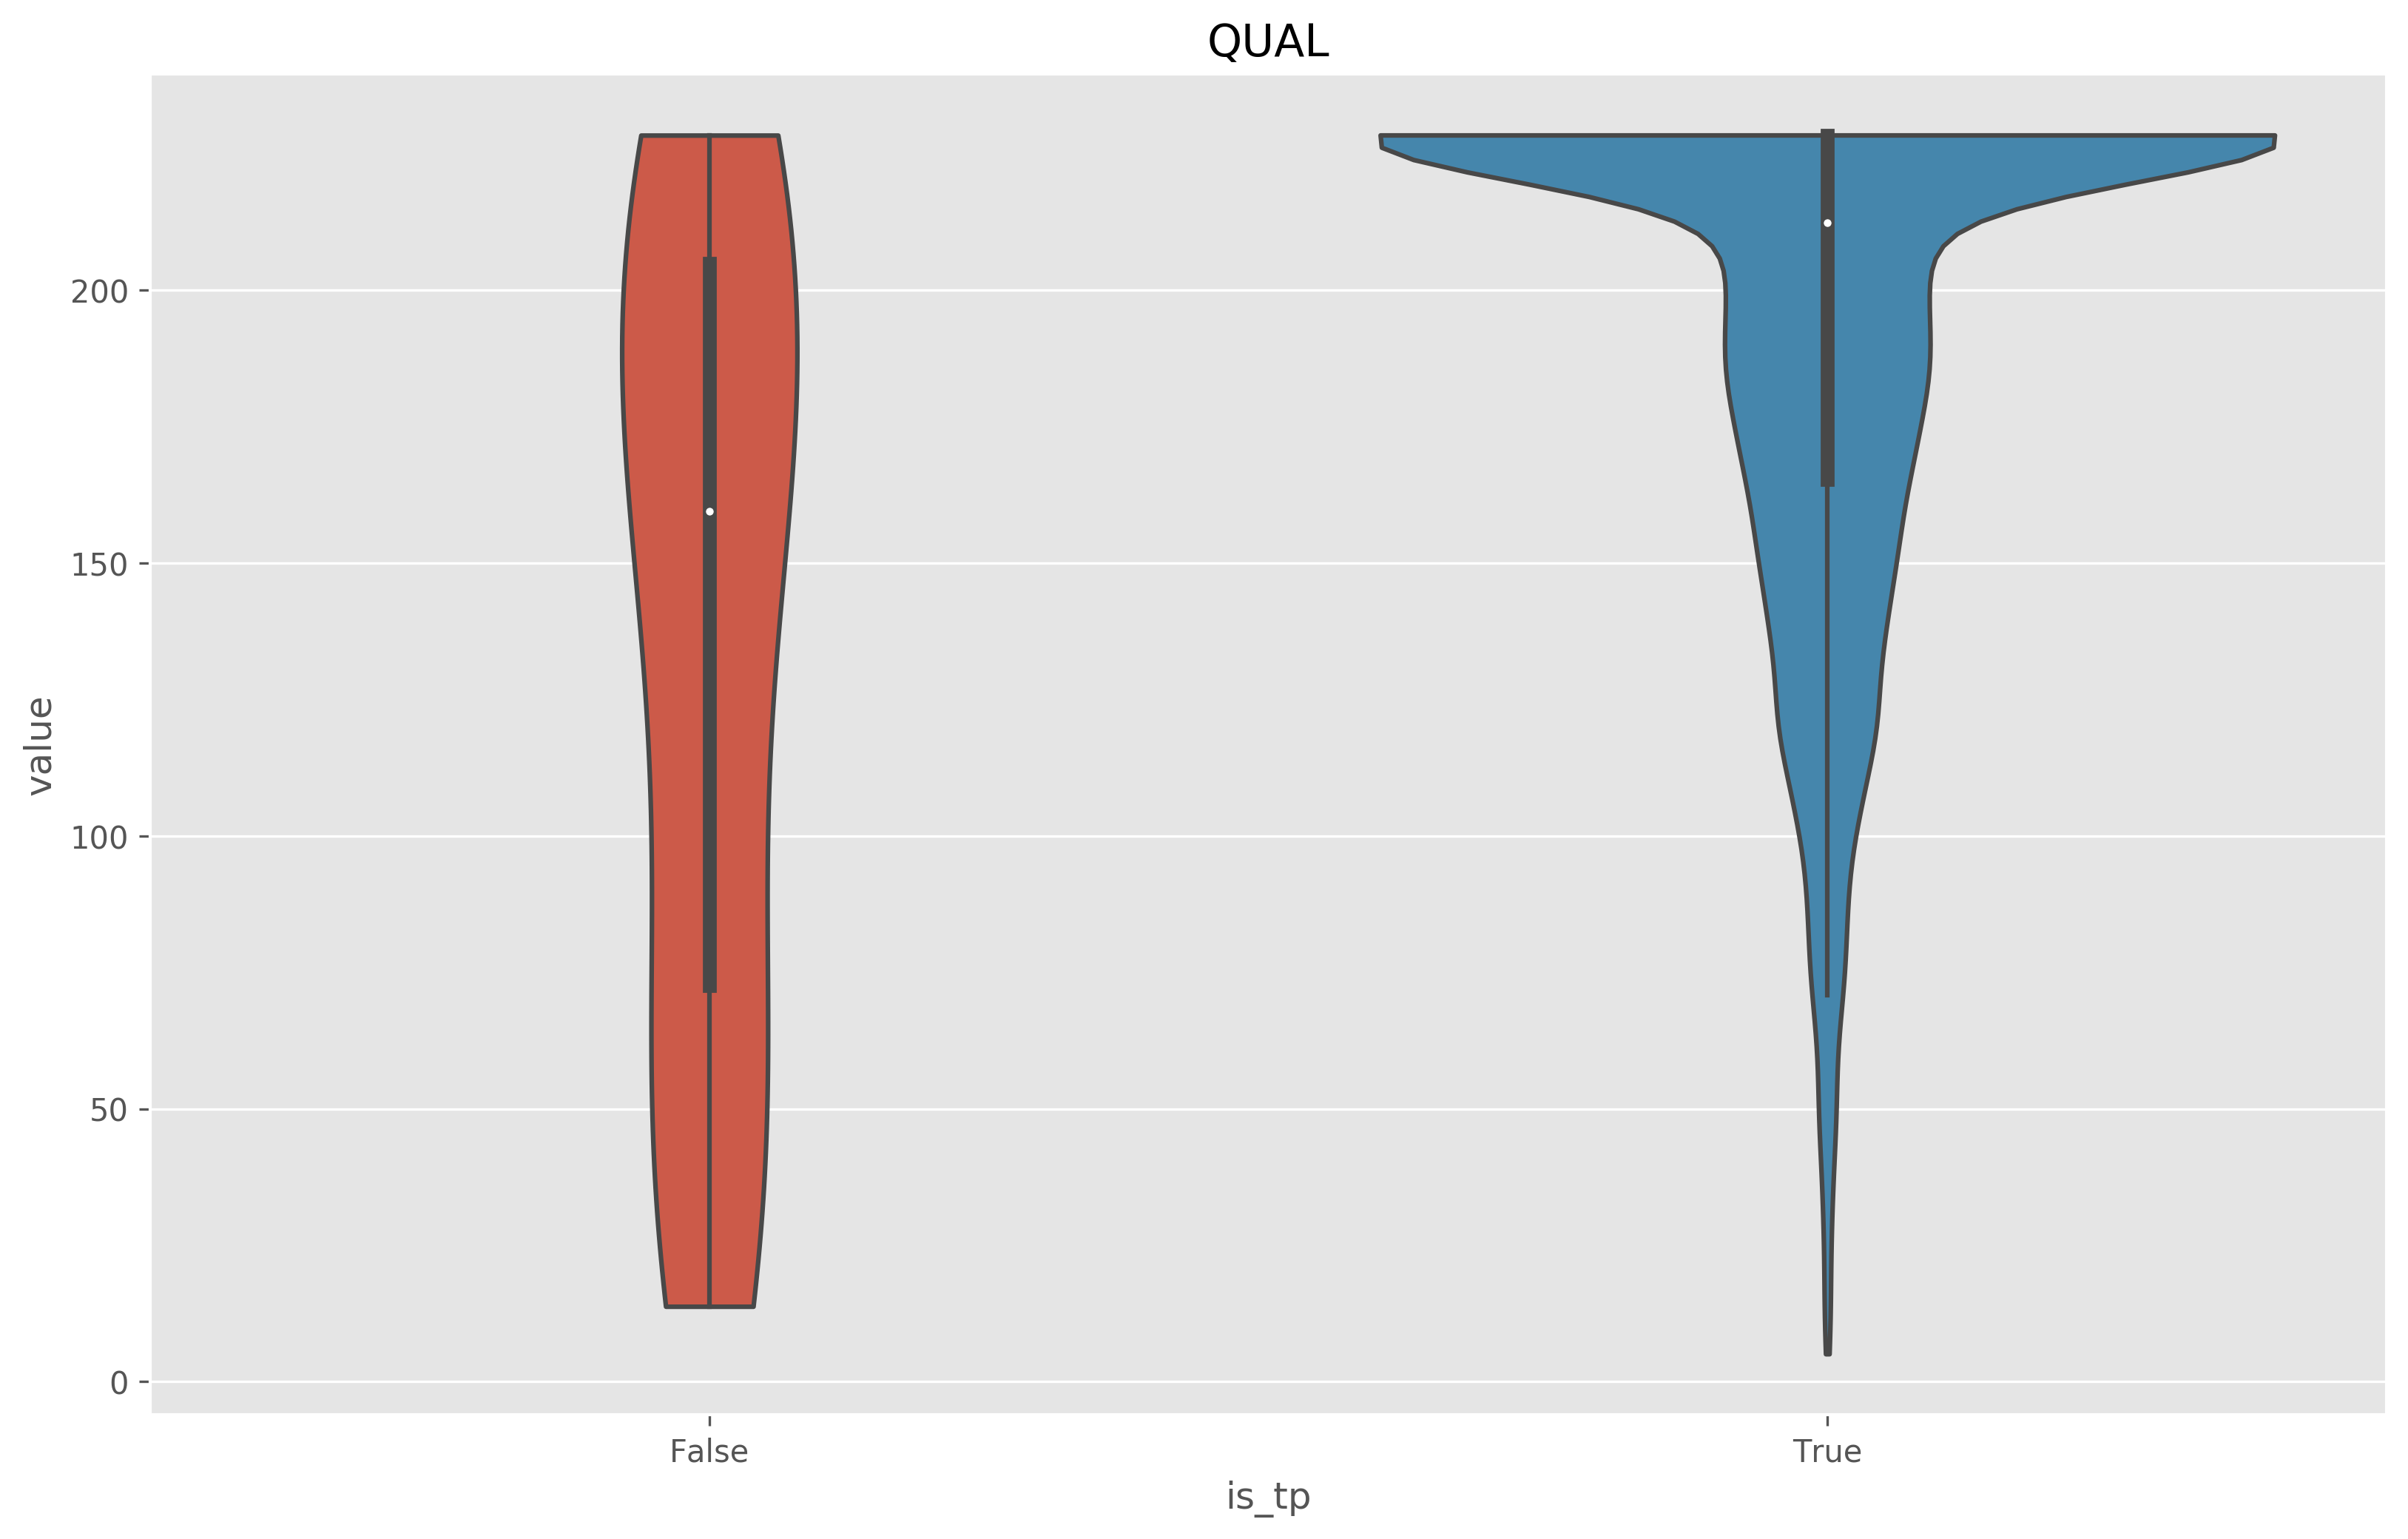

In [609]:
fig, ax = plt.subplots(figsize=(13, 8), dpi=300)
x = "is_tp"
y = "value"
field = "QUAL"
data = data=df.query("field==@field")
# sns.histplot(data=data, x=y, hue=x, ax=ax)
sns.violinplot(data=data, x=x, y=y, ax=ax, cut=0)
ax.set_title(field)

Text(0.5, 1.0, 'QUAL')

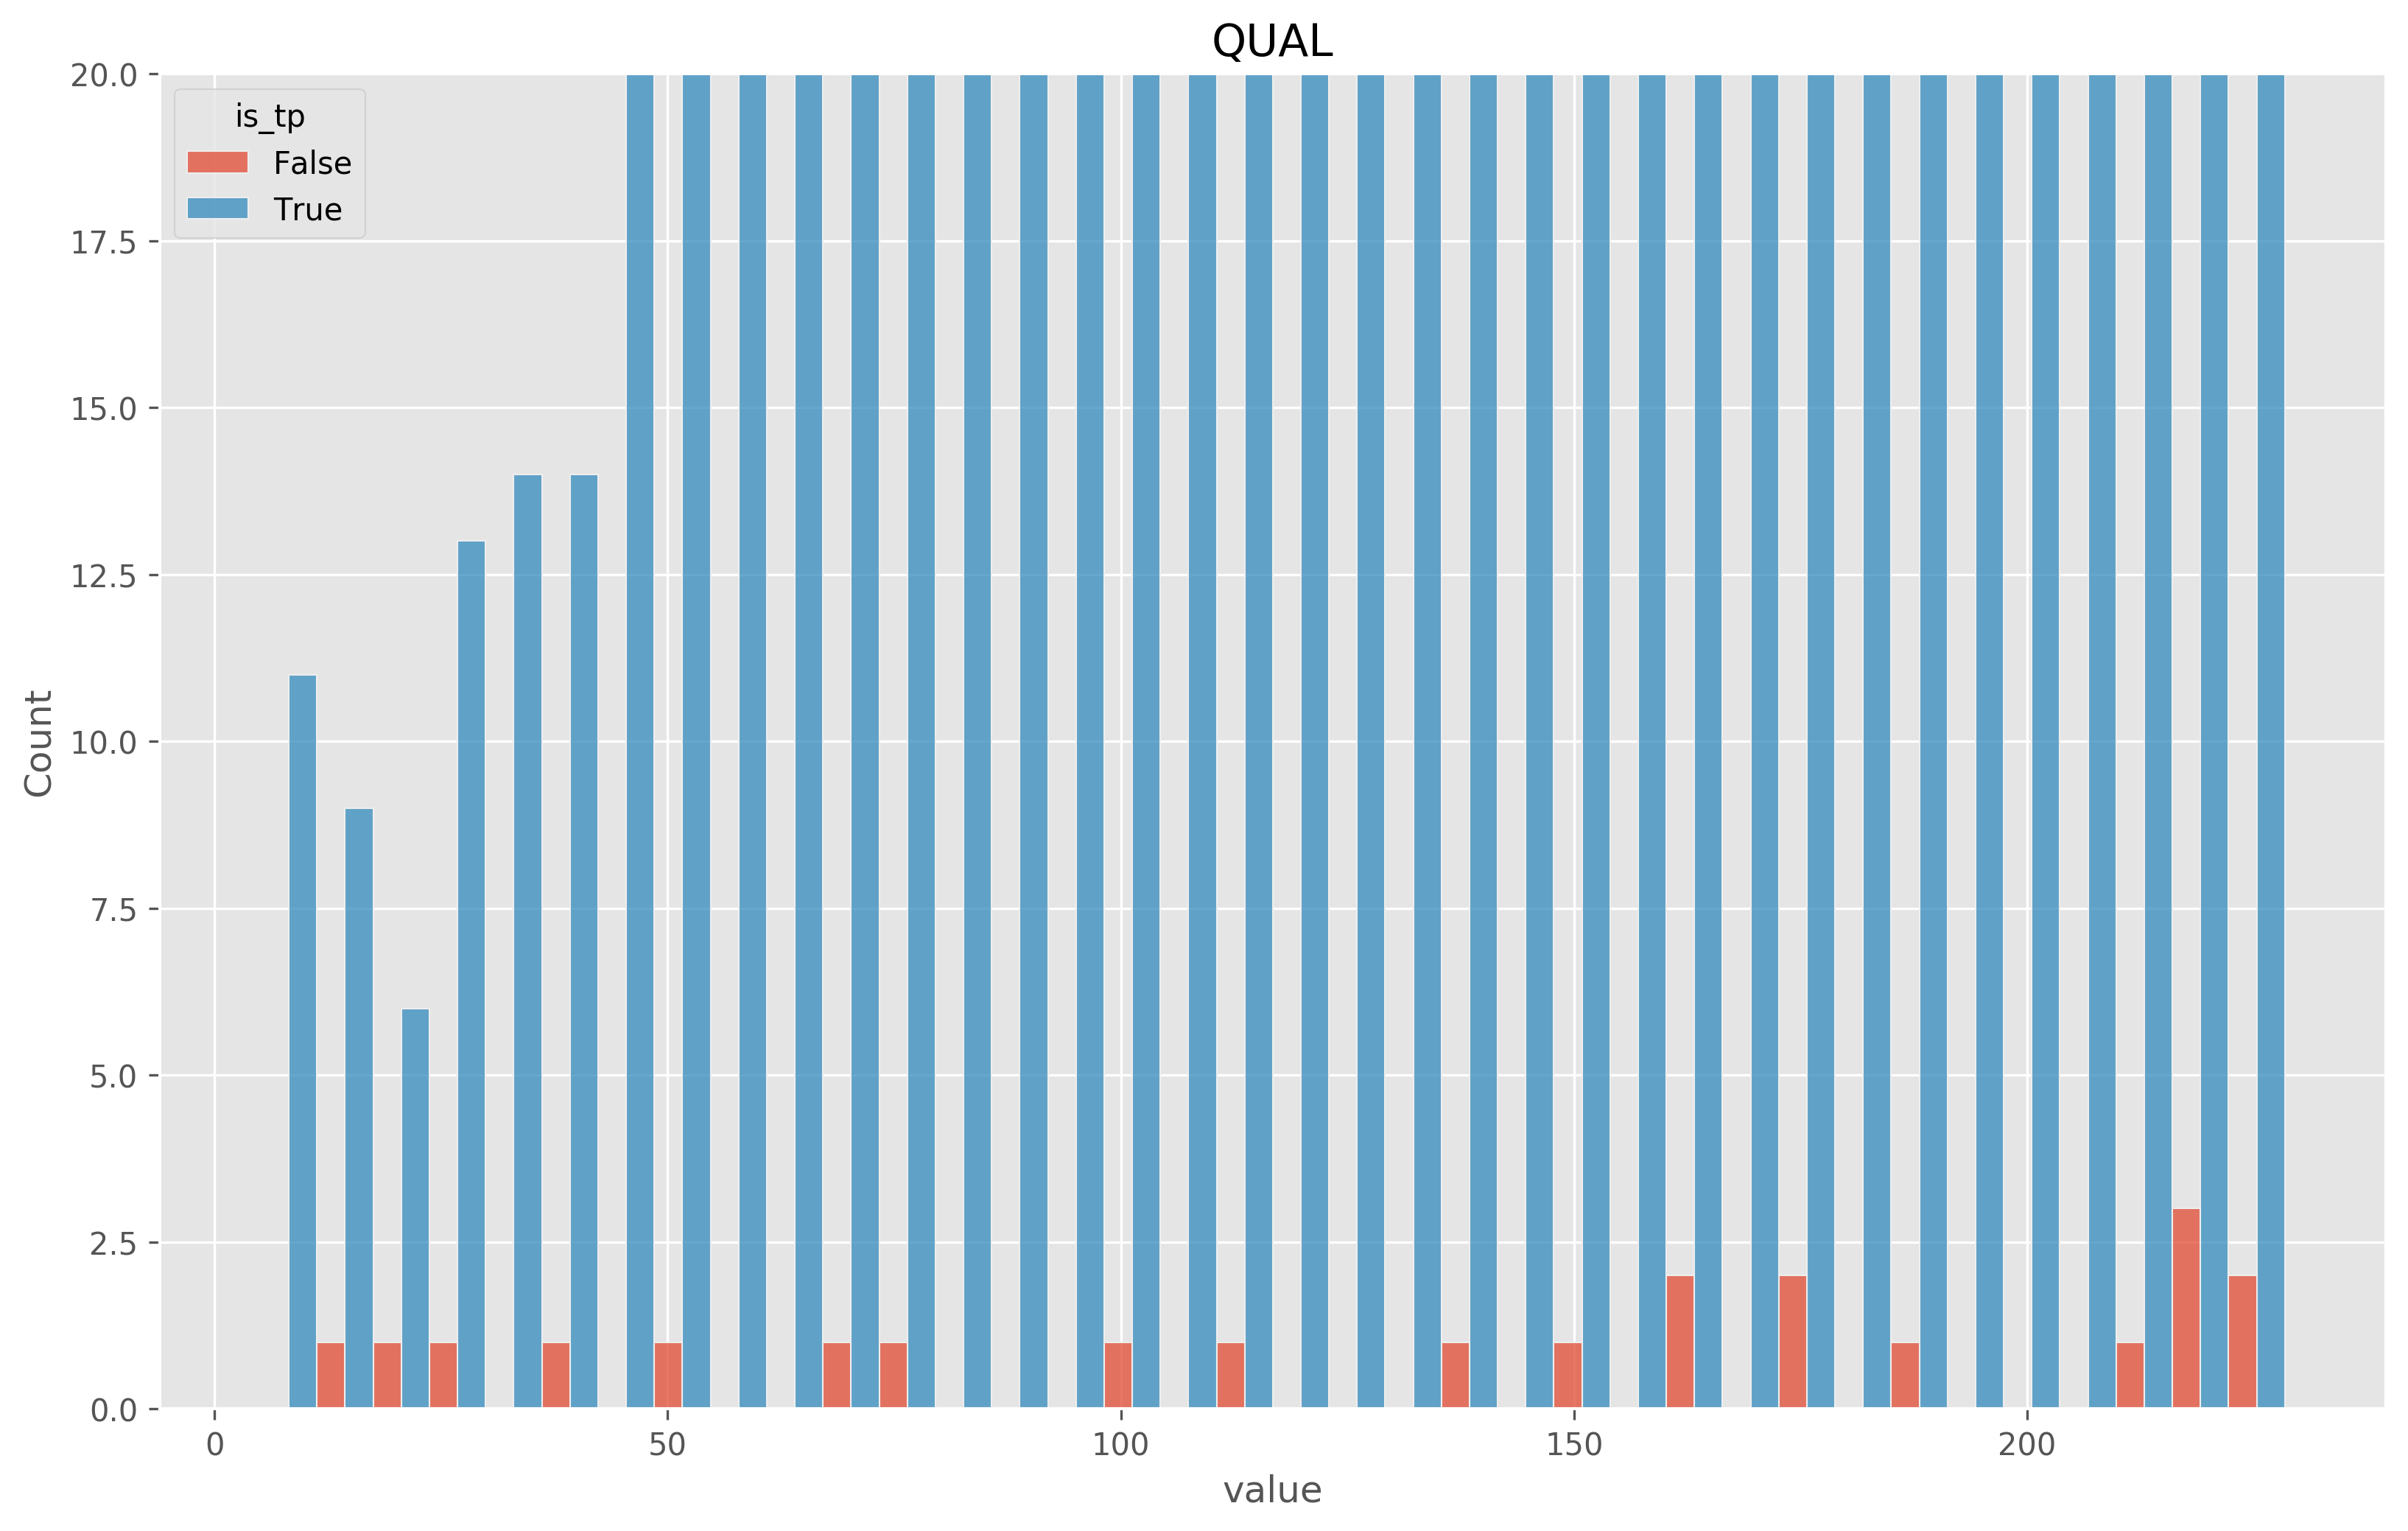

In [610]:
fig, ax = plt.subplots(figsize=(13, 8), dpi=300)
data = data=df.query("field==@field")
sns.histplot(data=data, x=y, hue=x, ax=ax, multiple="dodge",)
# sns.histplot(data=data, x=y, hue=x, ax=ax, multiple="dodge", stat="percent", common_norm=False)
# ax.set_xlim((0, 70))
ax.set_ylim((0, 20))
# sns.violinplot(data=data, x=x, y=y, ax=ax)
ax.set_title(field)

In [611]:
fig, ax = plt.subplots(figsize=(13, 8), dpi=300)
x = "is_tp"
y = "value"
field = "FRS"
data = data=df.query("field==@field")
# sns.histplot(data=data, x=y, hue=x, ax=ax)
sns.violinplot(data=data, x=x, y=y, ax=ax, cut=0)
ax.set_title(field)

Text(0.5, 1.0, 'FRS')

Text(0.5, 1.0, 'FRS')

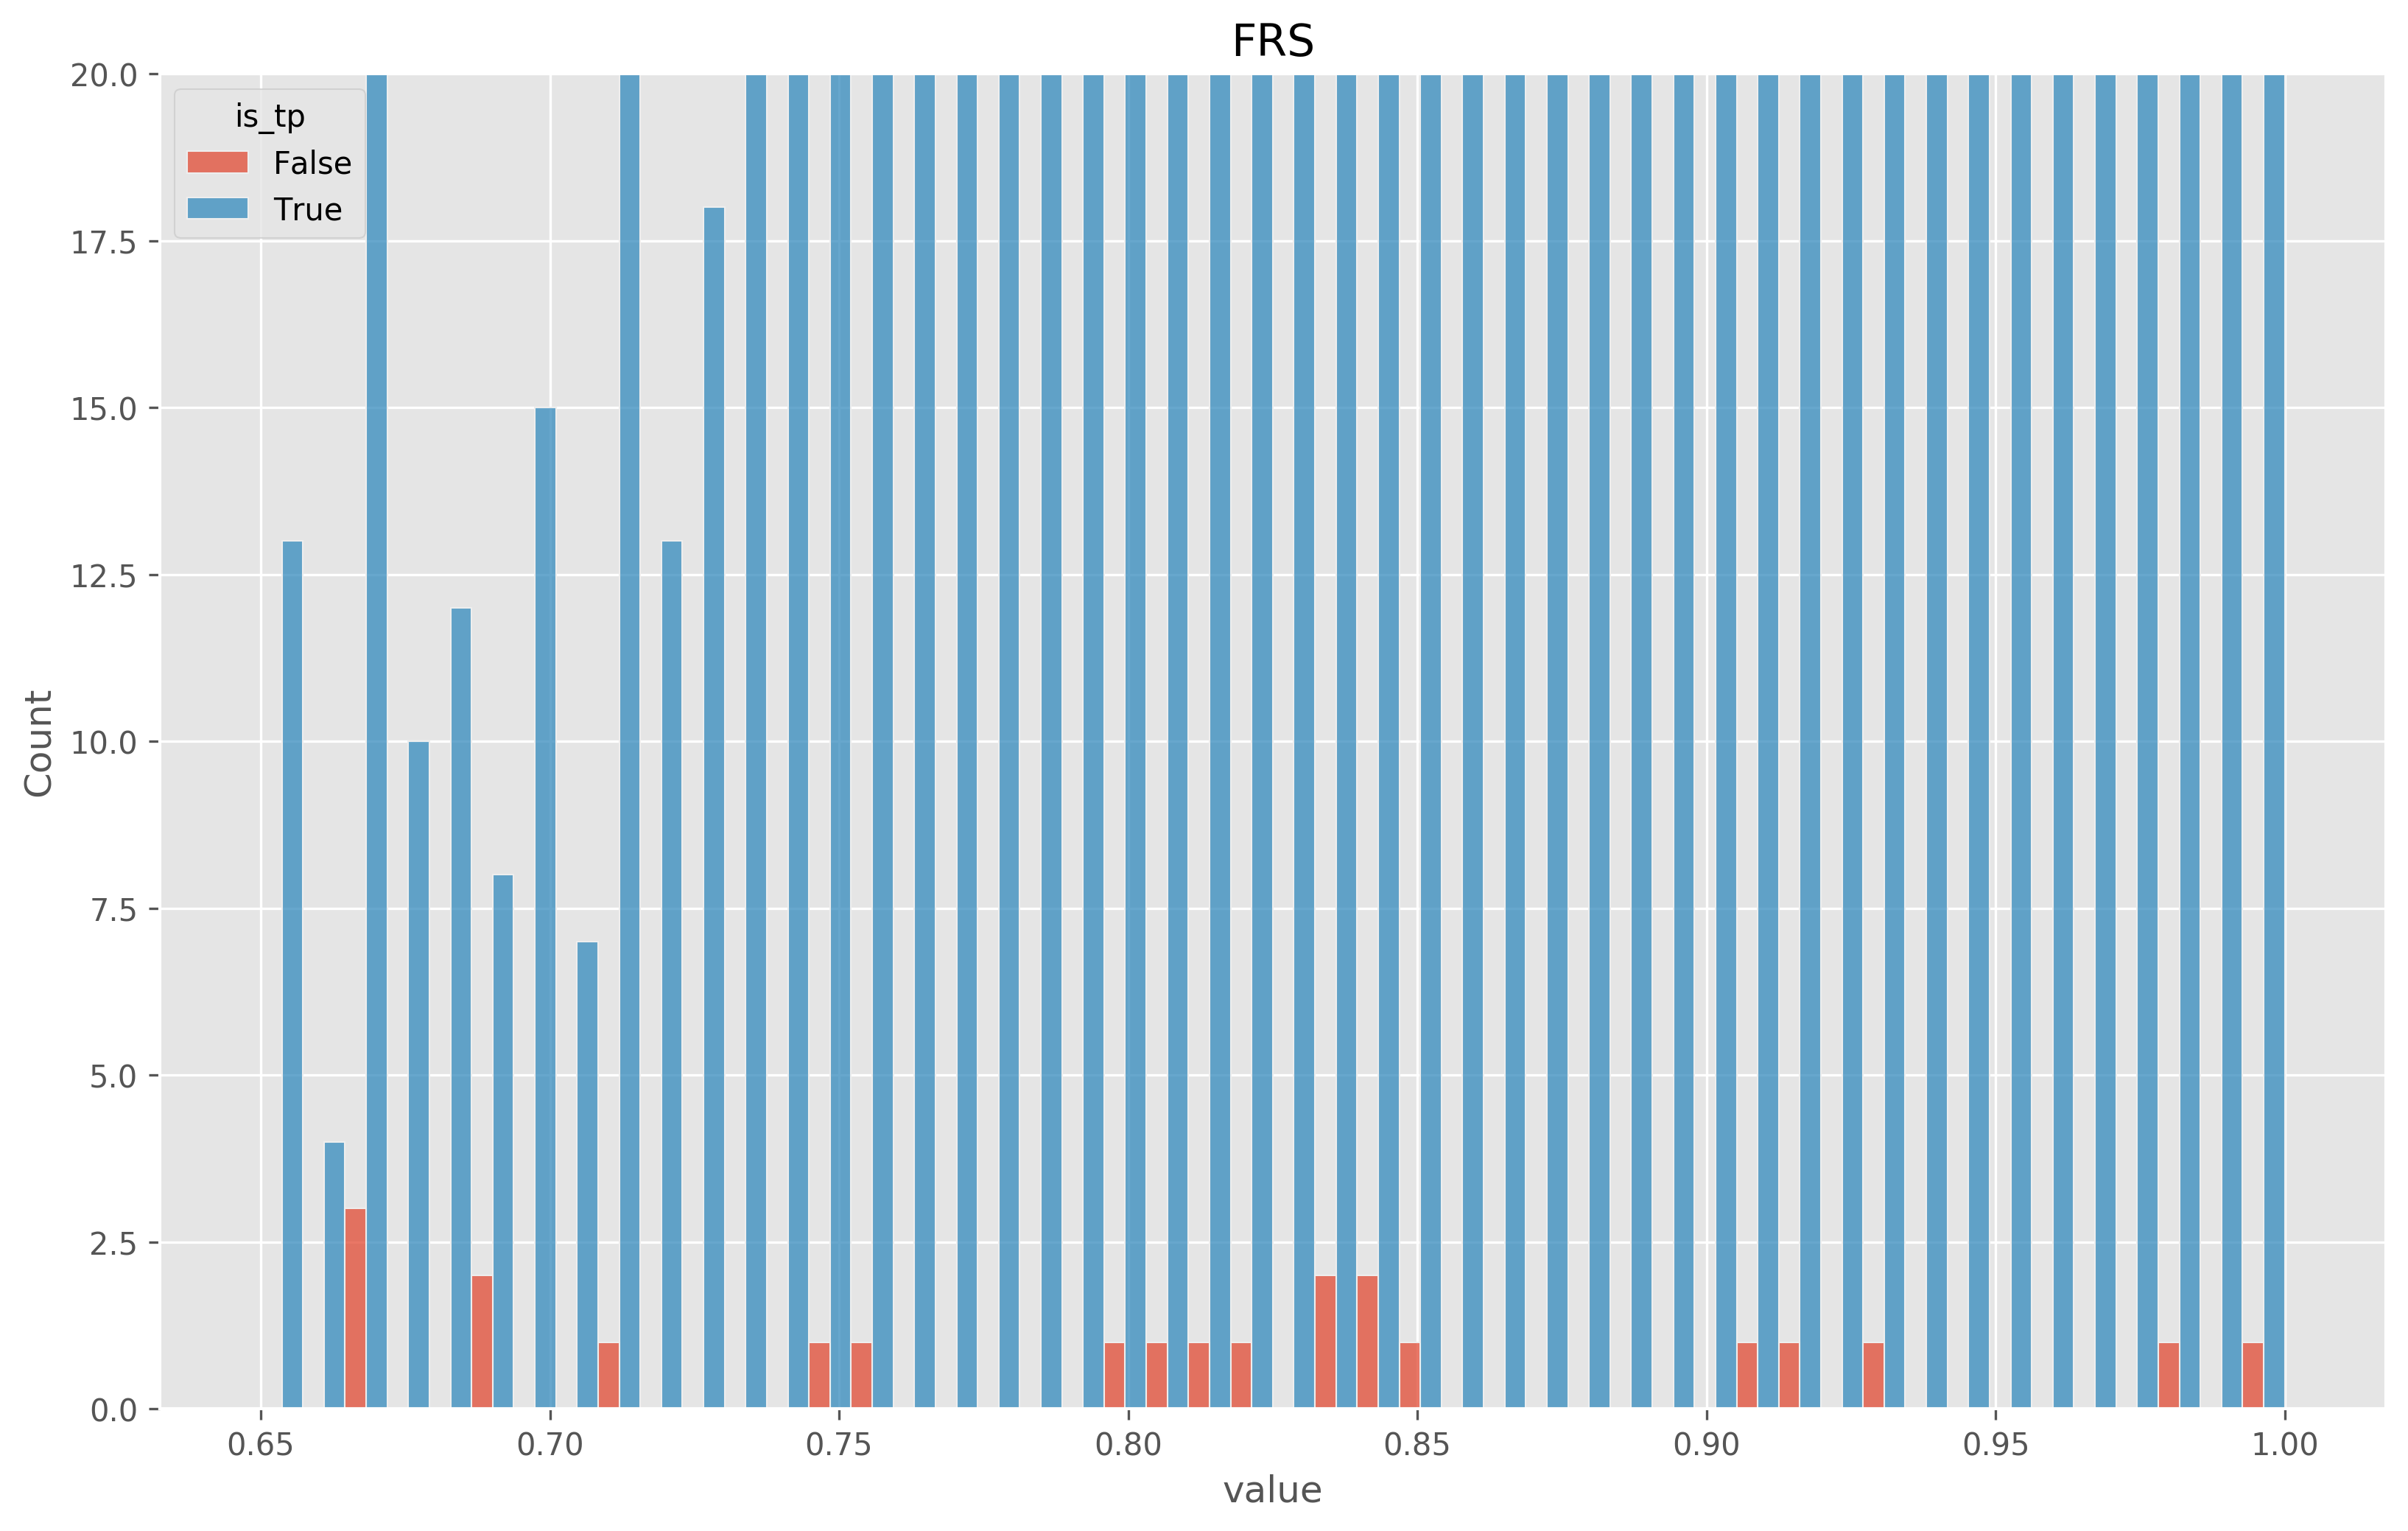

In [612]:
fig, ax = plt.subplots(figsize=(13, 8), dpi=300)
data = data=df.query("field==@field")
# sns.histplot(data=data, x=y, hue=x, ax=ax, multiple="dodge", stat="percent", common_norm=False)
sns.histplot(data=data, x=y, hue=x, ax=ax, multiple="dodge",)
# ax.set_xlim((0, 60))
ax.set_ylim((0, 20))
# sns.violinplot(data=data, x=x, y=y, ax=ax)
ax.set_title(field)

In [613]:
fig, ax = plt.subplots(figsize=(13, 8), dpi=300)
x = "is_tp"
y = "value"
field = "SB"
data = data=df.query("field==@field")
# sns.histplot(data=data, x=y, hue=x, ax=ax)
sns.violinplot(data=data, x=x, y=y, ax=ax, cut=0)
ax.set_title(field)

Text(0.5, 1.0, 'SB')

Text(0.5, 1.0, 'SB')

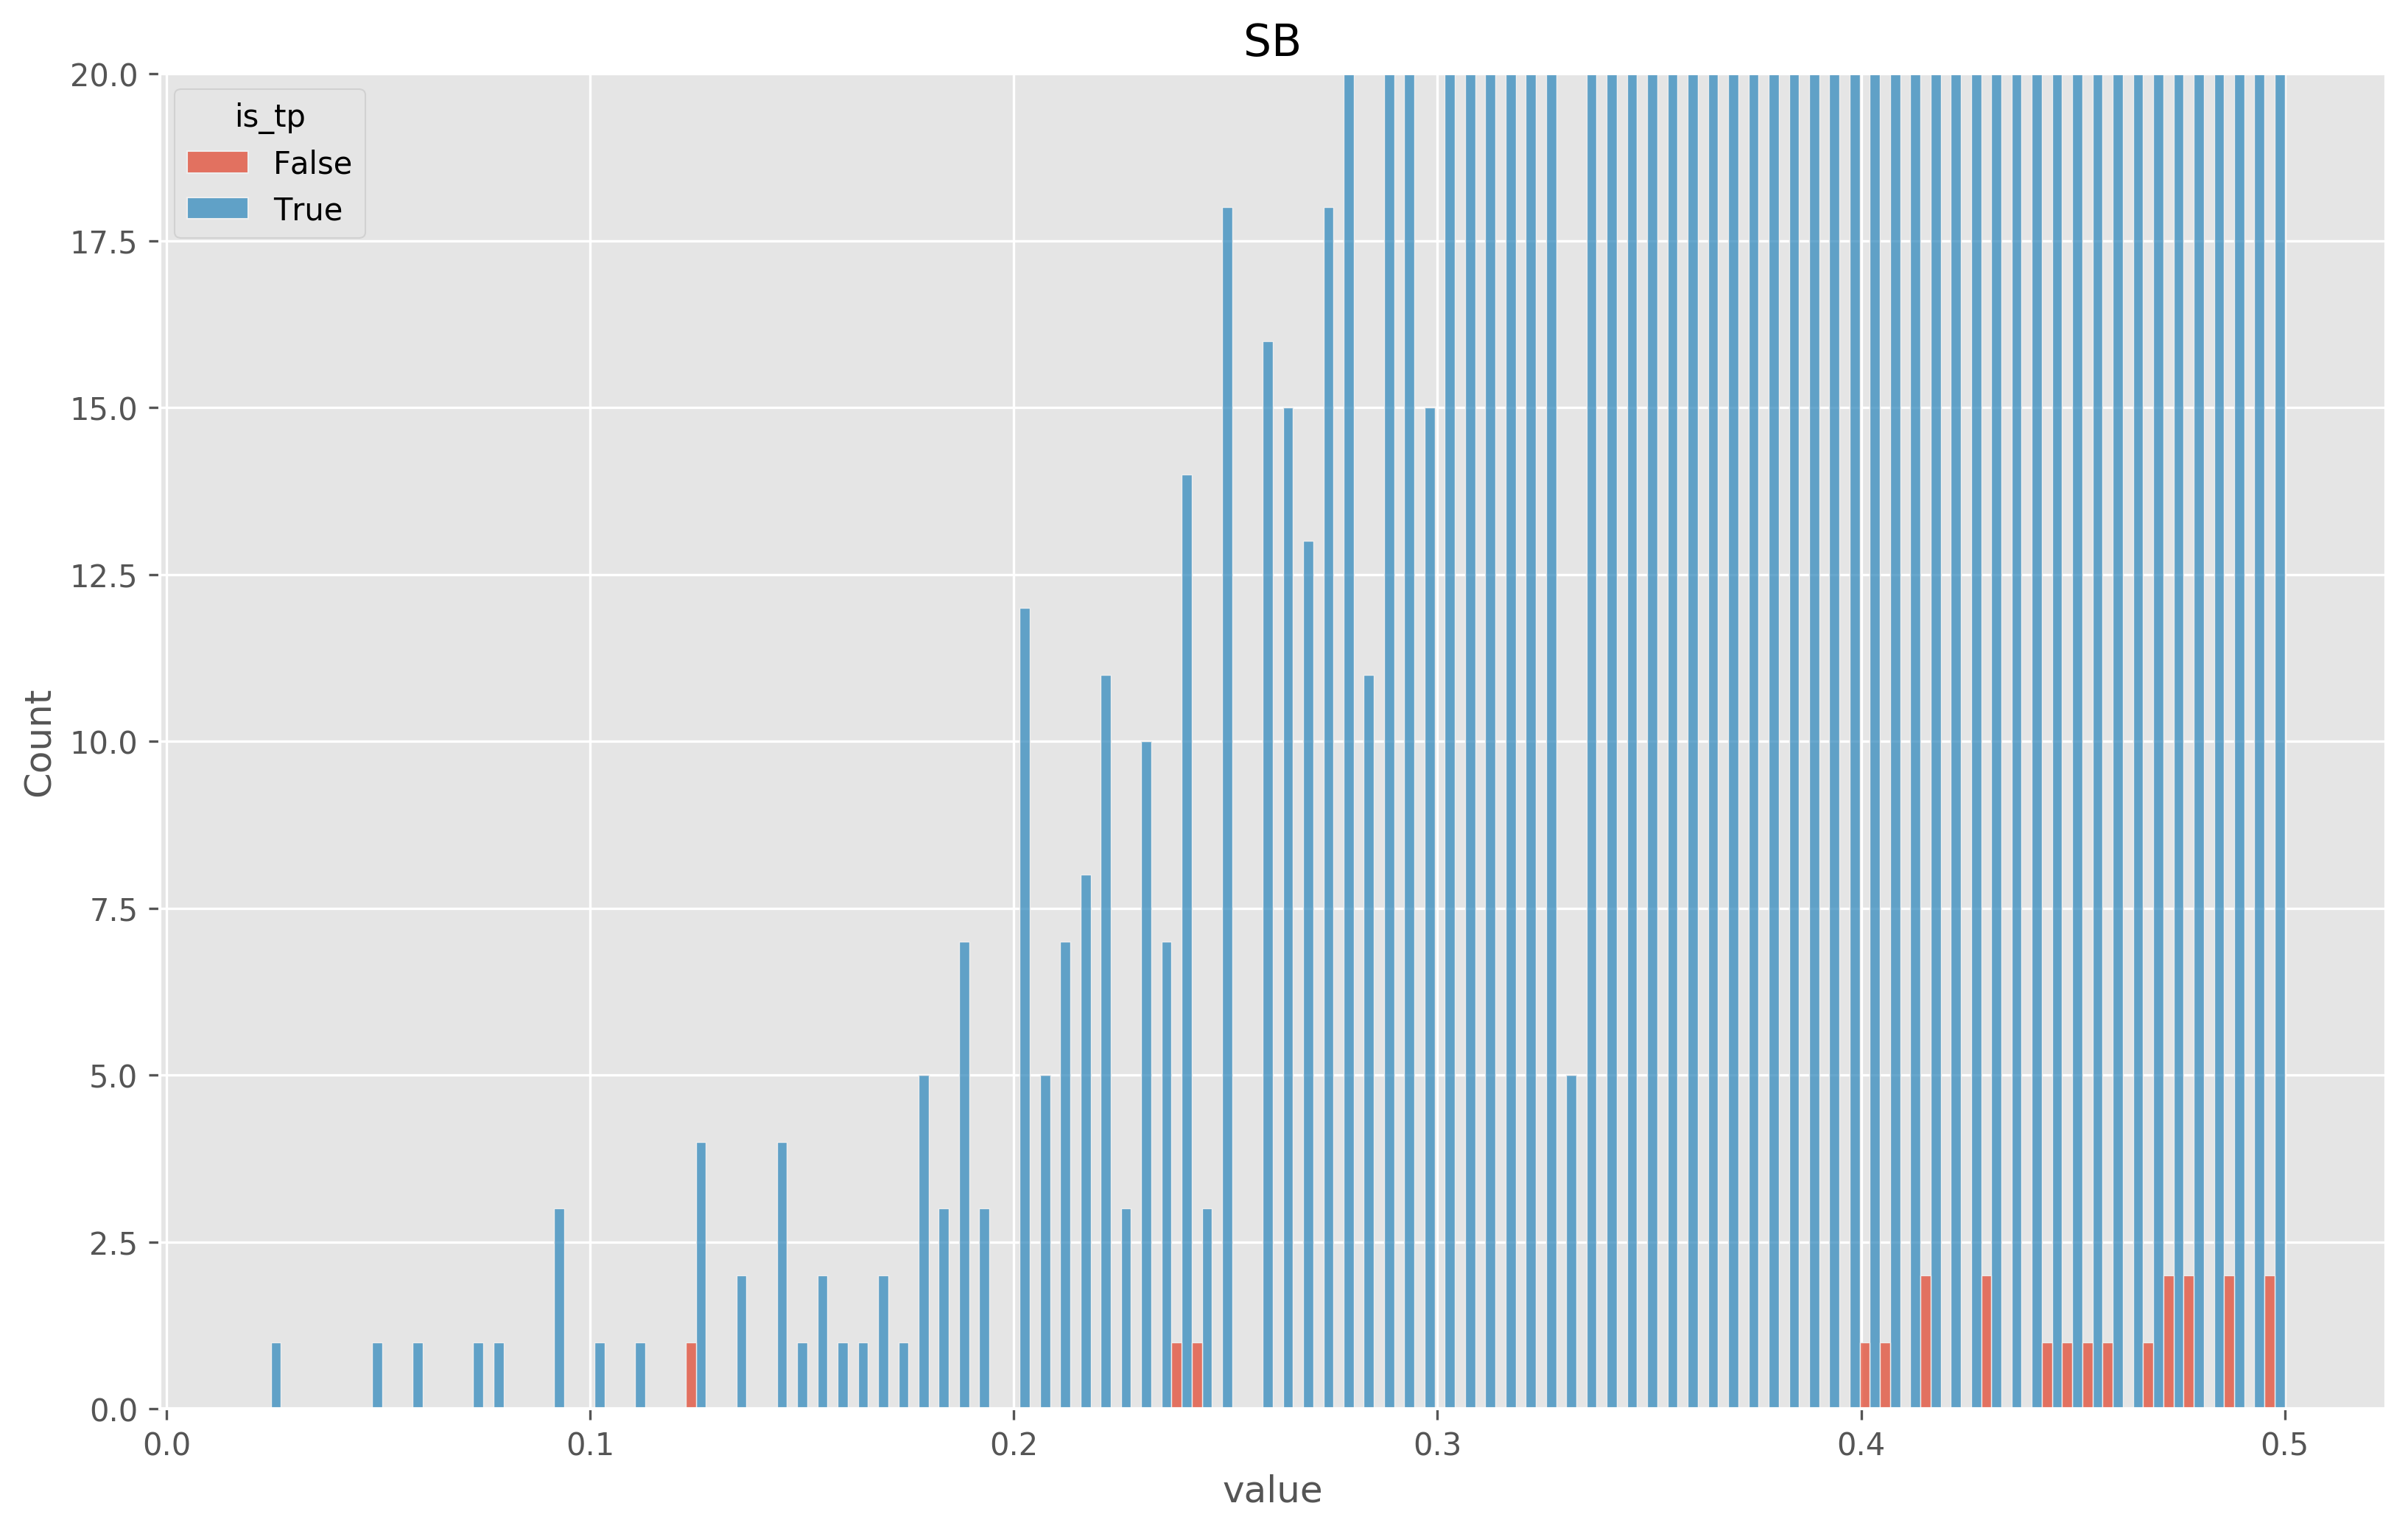

In [614]:
fig, ax = plt.subplots(figsize=(13, 8), dpi=300)
data = data=df.query("field==@field")
sns.histplot(data=data, x=y, hue=x, ax=ax, multiple="dodge", bins=100)
# sns.histplot(data=data, x=y, hue=x, ax=ax, multiple="dodge", stat="percent", common_norm=False)
# ax.set_xlim((0, 0.2))
ax.set_ylim((0, 20))
# sns.violinplot(data=data, x=x, y=y, ax=ax)
ax.set_title(field)

In [679]:
fig, ax = plt.subplots(figsize=(13, 8), dpi=300)
x = "is_tp"
y = "value"
field = "MQ"
data = data=df.query("field==@field")
sns.violinplot(data=data, x=x, y=y, ax=ax, cut=0)
ax.set_title(field)

Text(0.5, 1.0, 'MQ')

In [680]:
fig, ax = plt.subplots(figsize=(13, 8), dpi=300)
data = data=df.query("field==@field")
sns.histplot(data=data, x=y, hue=x, ax=ax, multiple="dodge")
# sns.histplot(data=data, x=y, hue=x, ax=ax, multiple="dodge", stat="percent", common_norm=False)
# ax.set_xlim((40, 59))
ax.set_ylim((0, 20))
# sns.violinplot(data=data, x=x, y=y, ax=ax)
ax.set_title(field)

Text(0.5, 1.0, 'MQ')

In [617]:
fig, ax = plt.subplots(figsize=(13, 8), dpi=300)
x = "is_tp"
y = "value"
field = info[0]
data = data=df.query("field==@field")
sns.violinplot(data=data, x=x, y=y, ax=ax, cut=0)
ax.set_title(field)

Text(0.5, 1.0, 'BQBZ')

Text(0.5, 1.0, 'BQBZ')

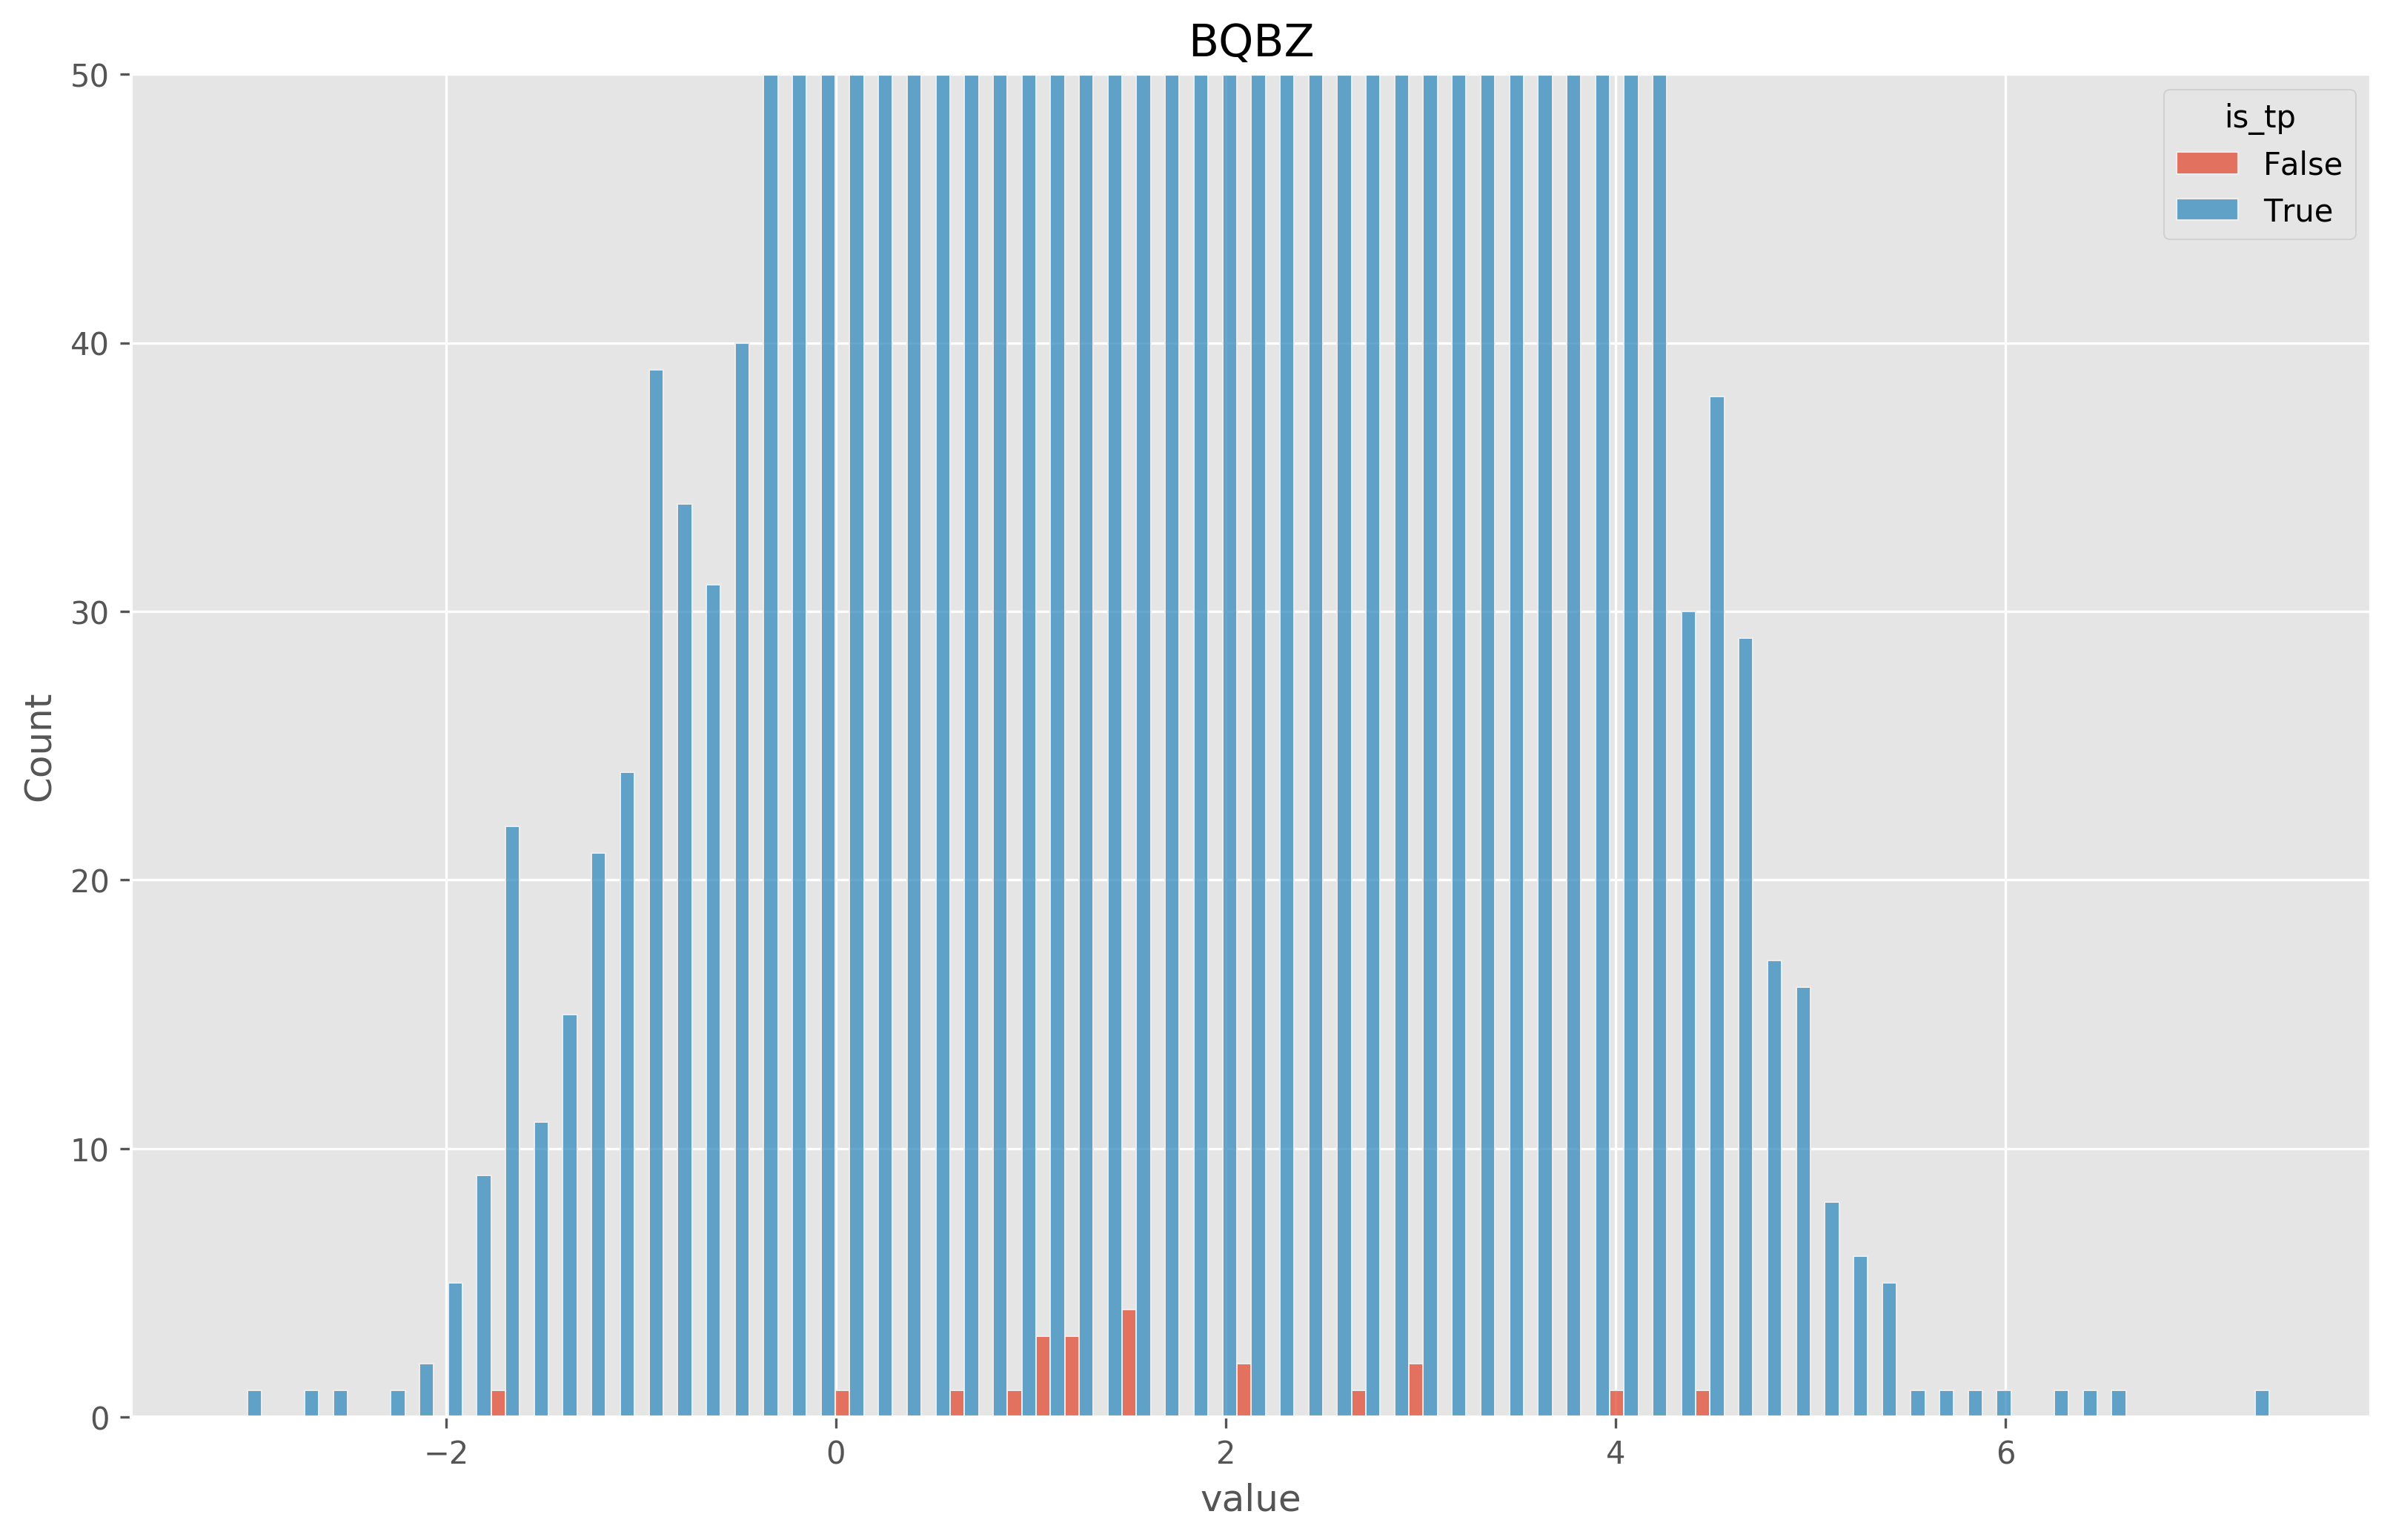

In [618]:
fig, ax = plt.subplots(figsize=(13, 8), dpi=300)
data = data=df.query("field==@field")
sns.histplot(data=data, x=y, hue=x, ax=ax, multiple="dodge")
# sns.histplot(data=data, x=y, hue=x, ax=ax, multiple="dodge", stat="percent", common_norm=False)
# ax.set_xlim((30, 59))
ax.set_ylim((0, 50))
# sns.violinplot(data=data, x=x, y=y, ax=ax)
ax.set_title(field)

In [619]:
fig, ax = plt.subplots(figsize=(13, 8), dpi=300)
x = "is_tp"
y = "value"
field = info[1]
data = data=df.query("field==@field")
sns.violinplot(data=data, x=x, y=y, ax=ax, cut=0)
ax.set_title(field)

Text(0.5, 1.0, 'DP')

In [622]:
fig, ax = plt.subplots(figsize=(13, 8), dpi=300)
# data = data=df.query("field==@field and value > 180")
sns.histplot(data=data, x=y, hue=x, ax=ax, multiple="dodge", bins=300)
# sns.histplot(data=data, x=y, hue=x, ax=ax, multiple="dodge", stat="percent", common_norm=False)
ax.set_xlim((180, 280))
ax.set_ylim((0, 20))
# sns.violinplot(data=data, x=x, y=y, ax=ax)
ax.set_title(field)

Text(0.5, 1.0, 'DP')

Text(0.5, 1.0, 'RPBZ')

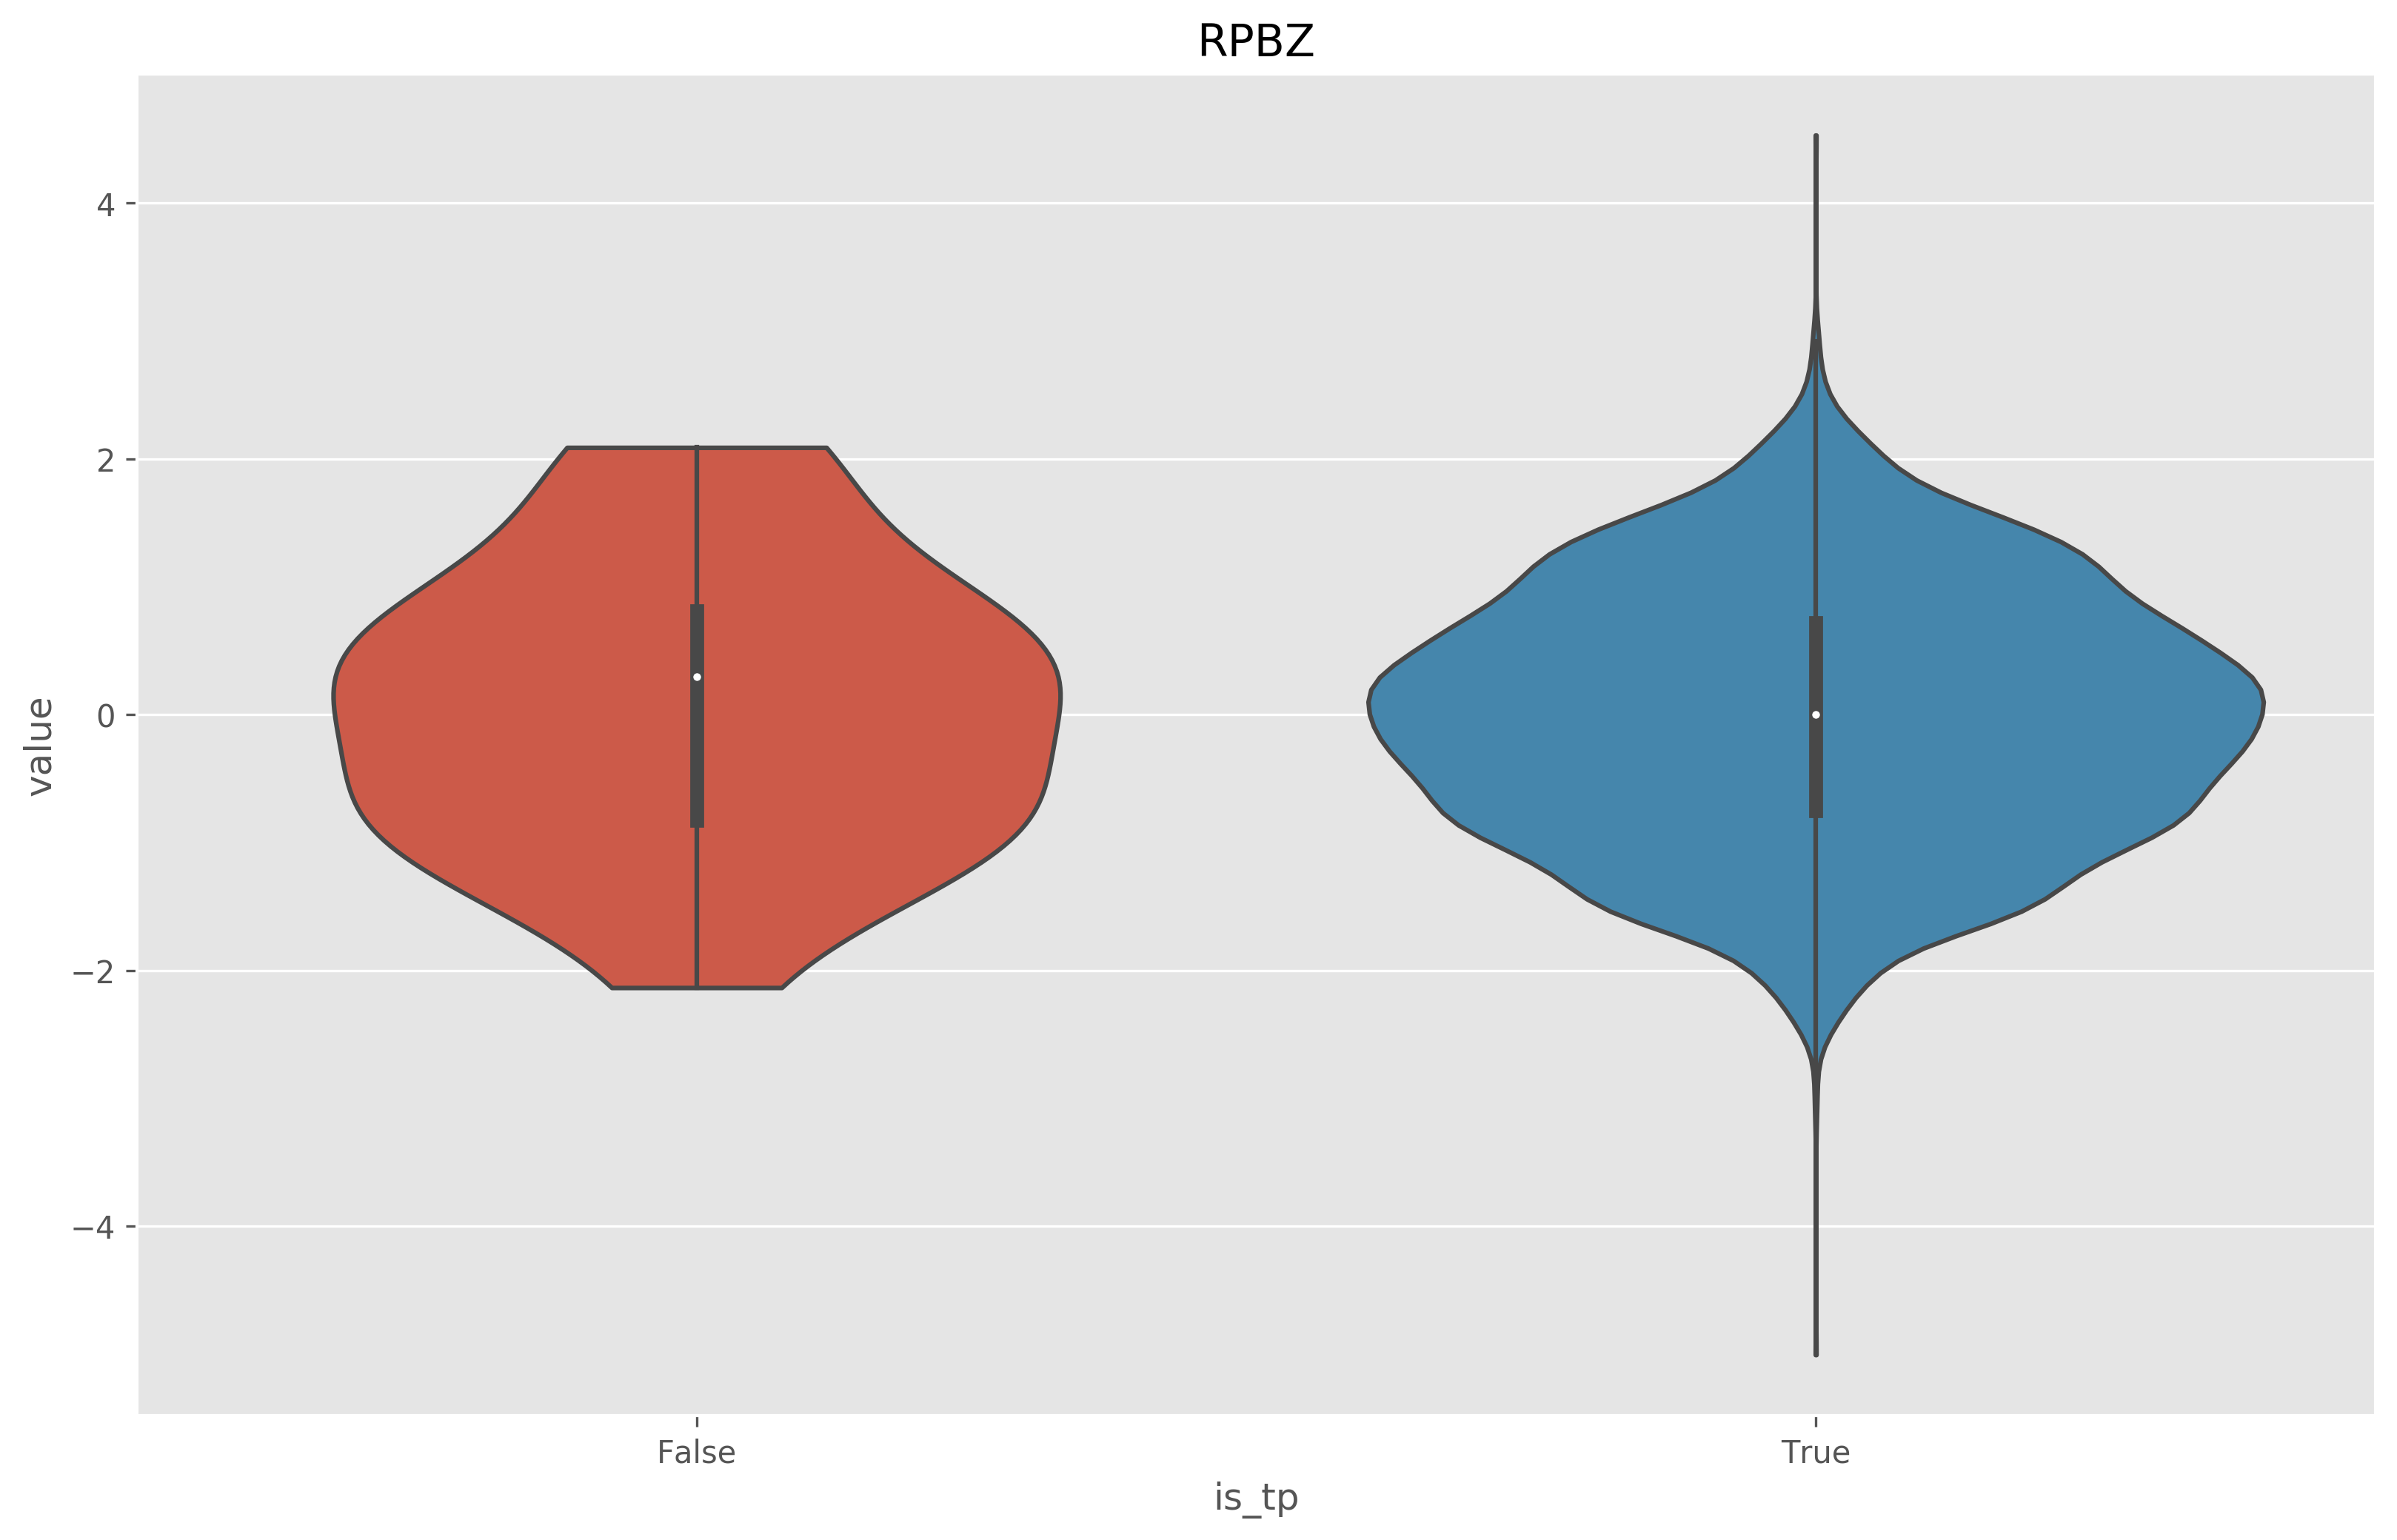

In [623]:
fig, ax = plt.subplots(figsize=(13, 8), dpi=300)
x = "is_tp"
y = "value"
field = info[5]
data = data=df.query("field==@field")
sns.violinplot(data=data, x=x, y=y, ax=ax, cut=0)
ax.set_title(field)

In [624]:
fig, ax = plt.subplots(figsize=(13, 8), dpi=300)
# data = data=df.query("field==@field and value < -3")
sns.histplot(data=data, x=y, hue=x, ax=ax, multiple="dodge", )
# sns.histplot(data=data, x=y, hue=x, ax=ax, multiple="dodge", stat="percent", common_norm=False)
# ax.set_xlim((3, 10))
ax.set_ylim((0, 50))
# sns.violinplot(data=data, x=x, y=y, ax=ax)
ax.set_title(field)

Text(0.5, 1.0, 'RPBZ')

Text(0.5, 1.0, 'SCBZ')

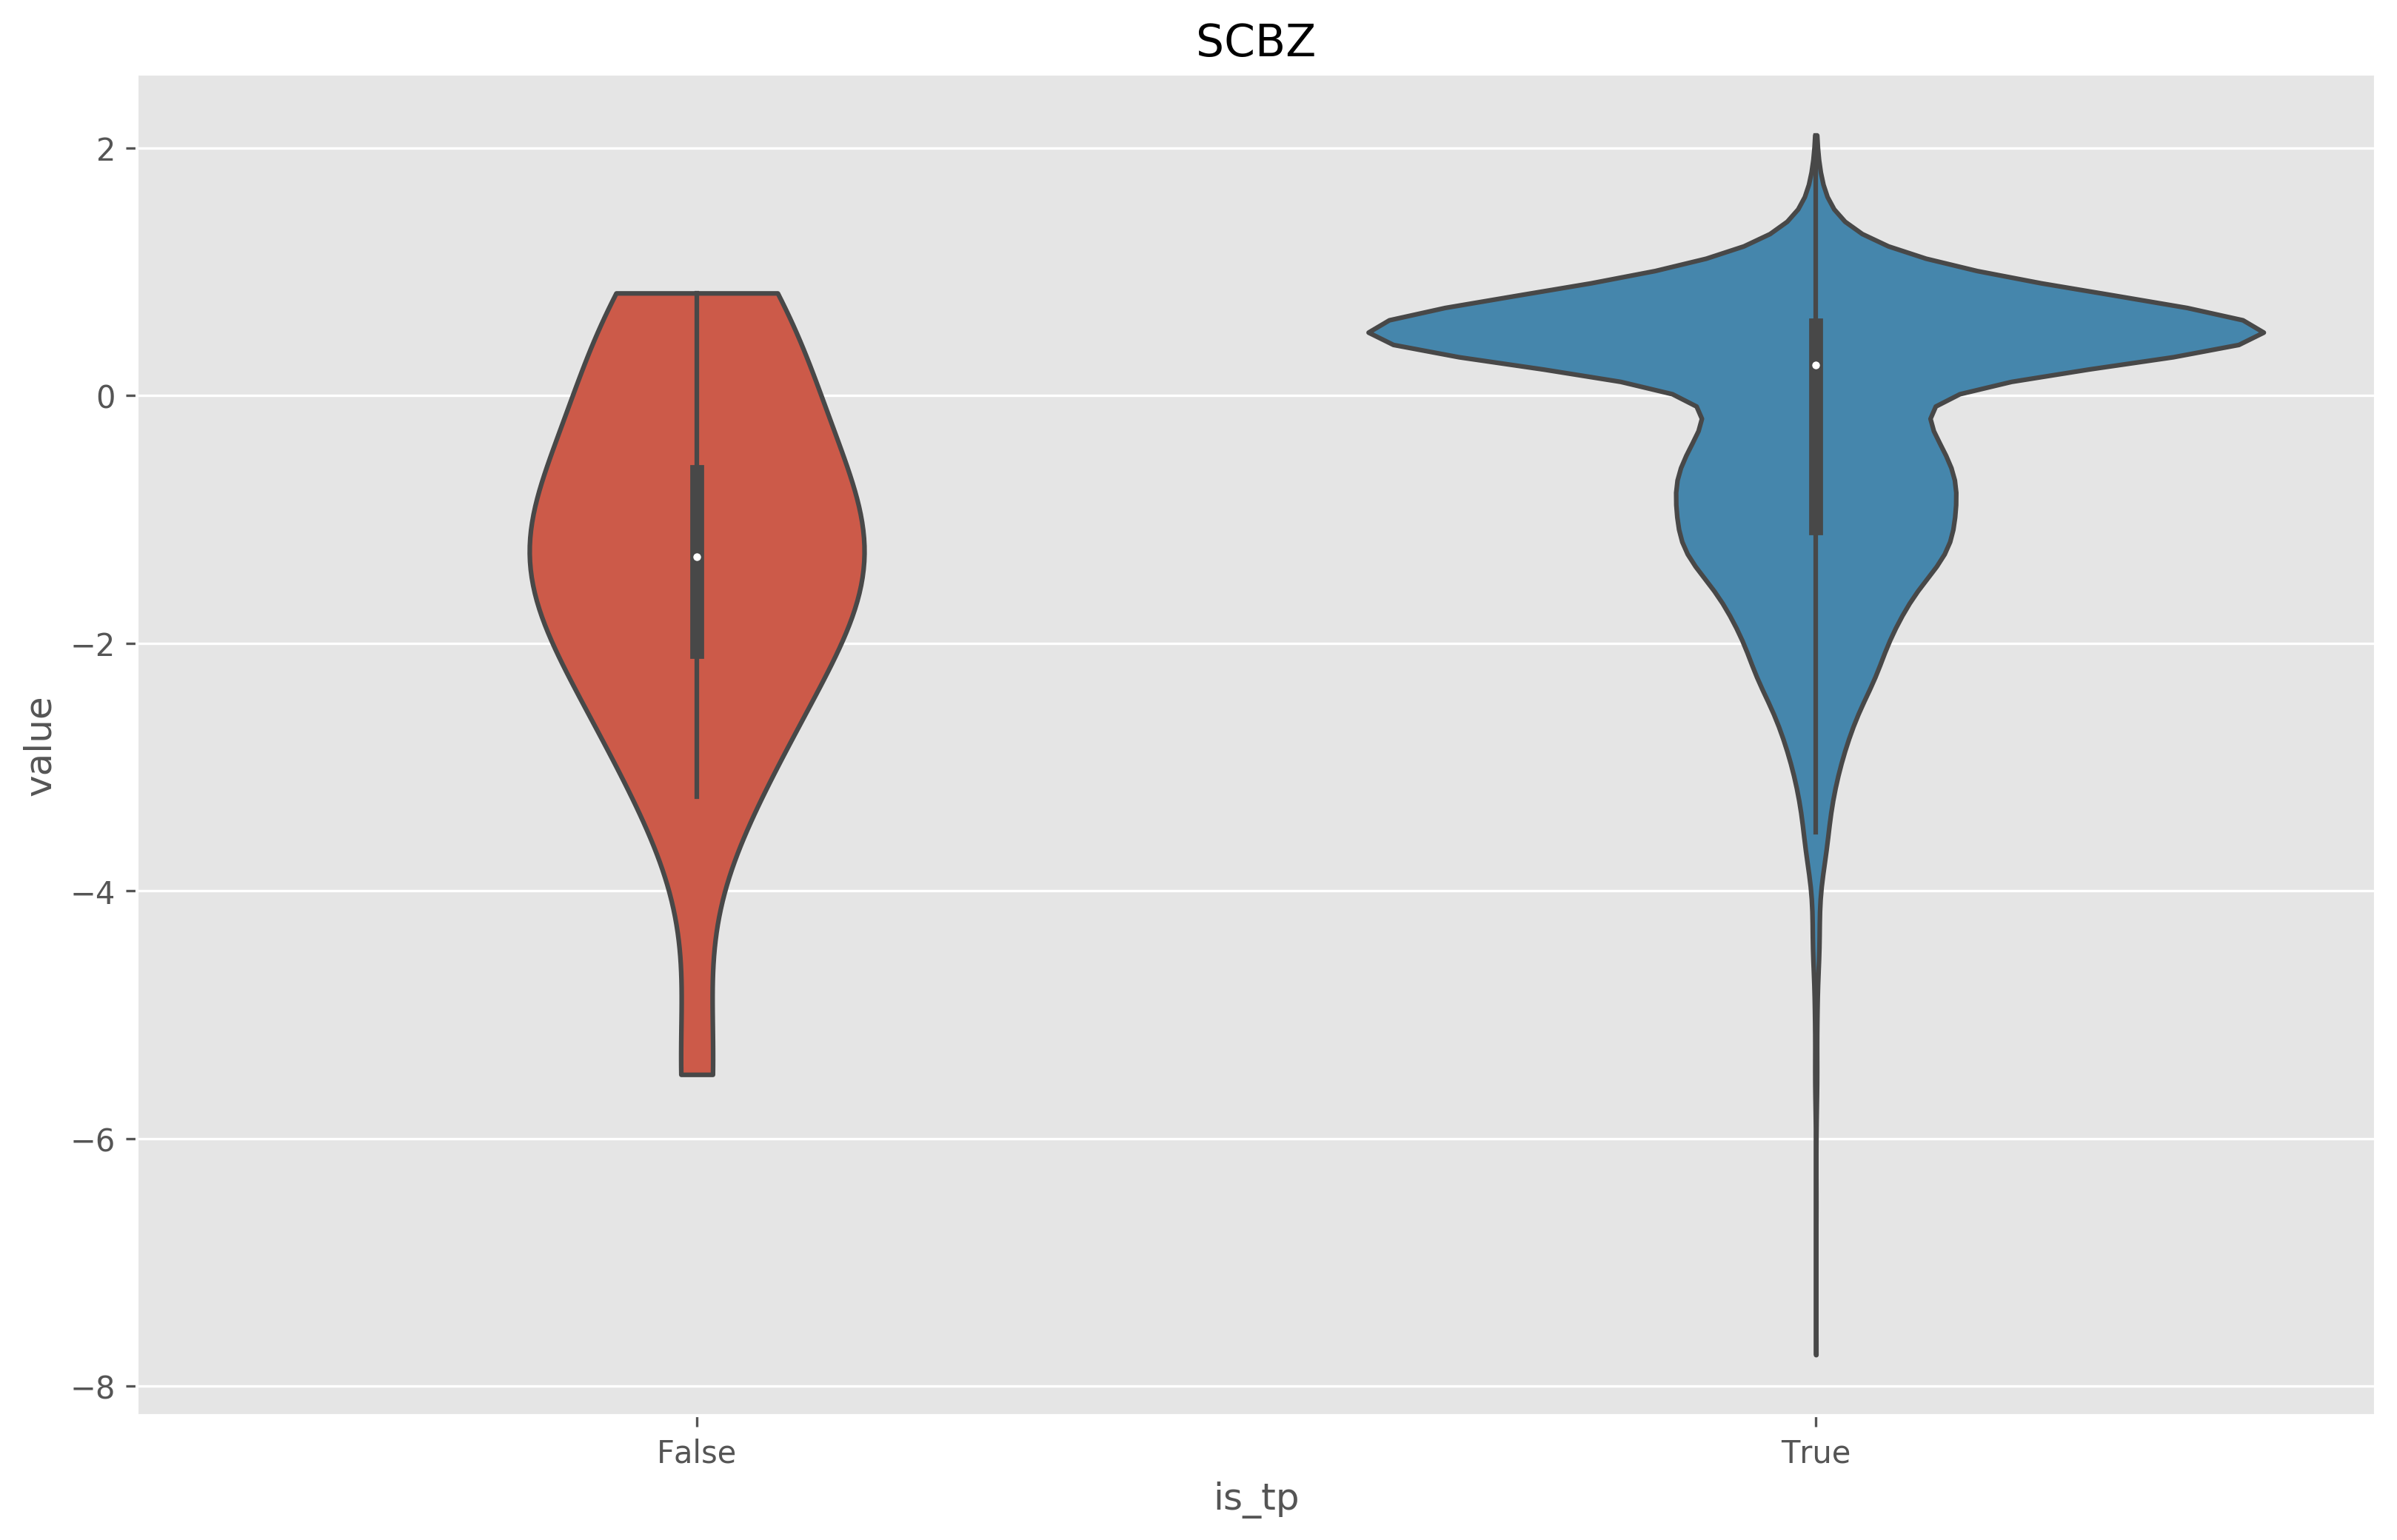

In [625]:
fig, ax = plt.subplots(figsize=(13, 8), dpi=300)
x = "is_tp"
y = "value"
field = info[6]
data = data=df.query("field==@field")
sns.violinplot(data=data, x=x, y=y, ax=ax, cut=0)
ax.set_title(field)

Text(0.5, 1.0, 'SCBZ')

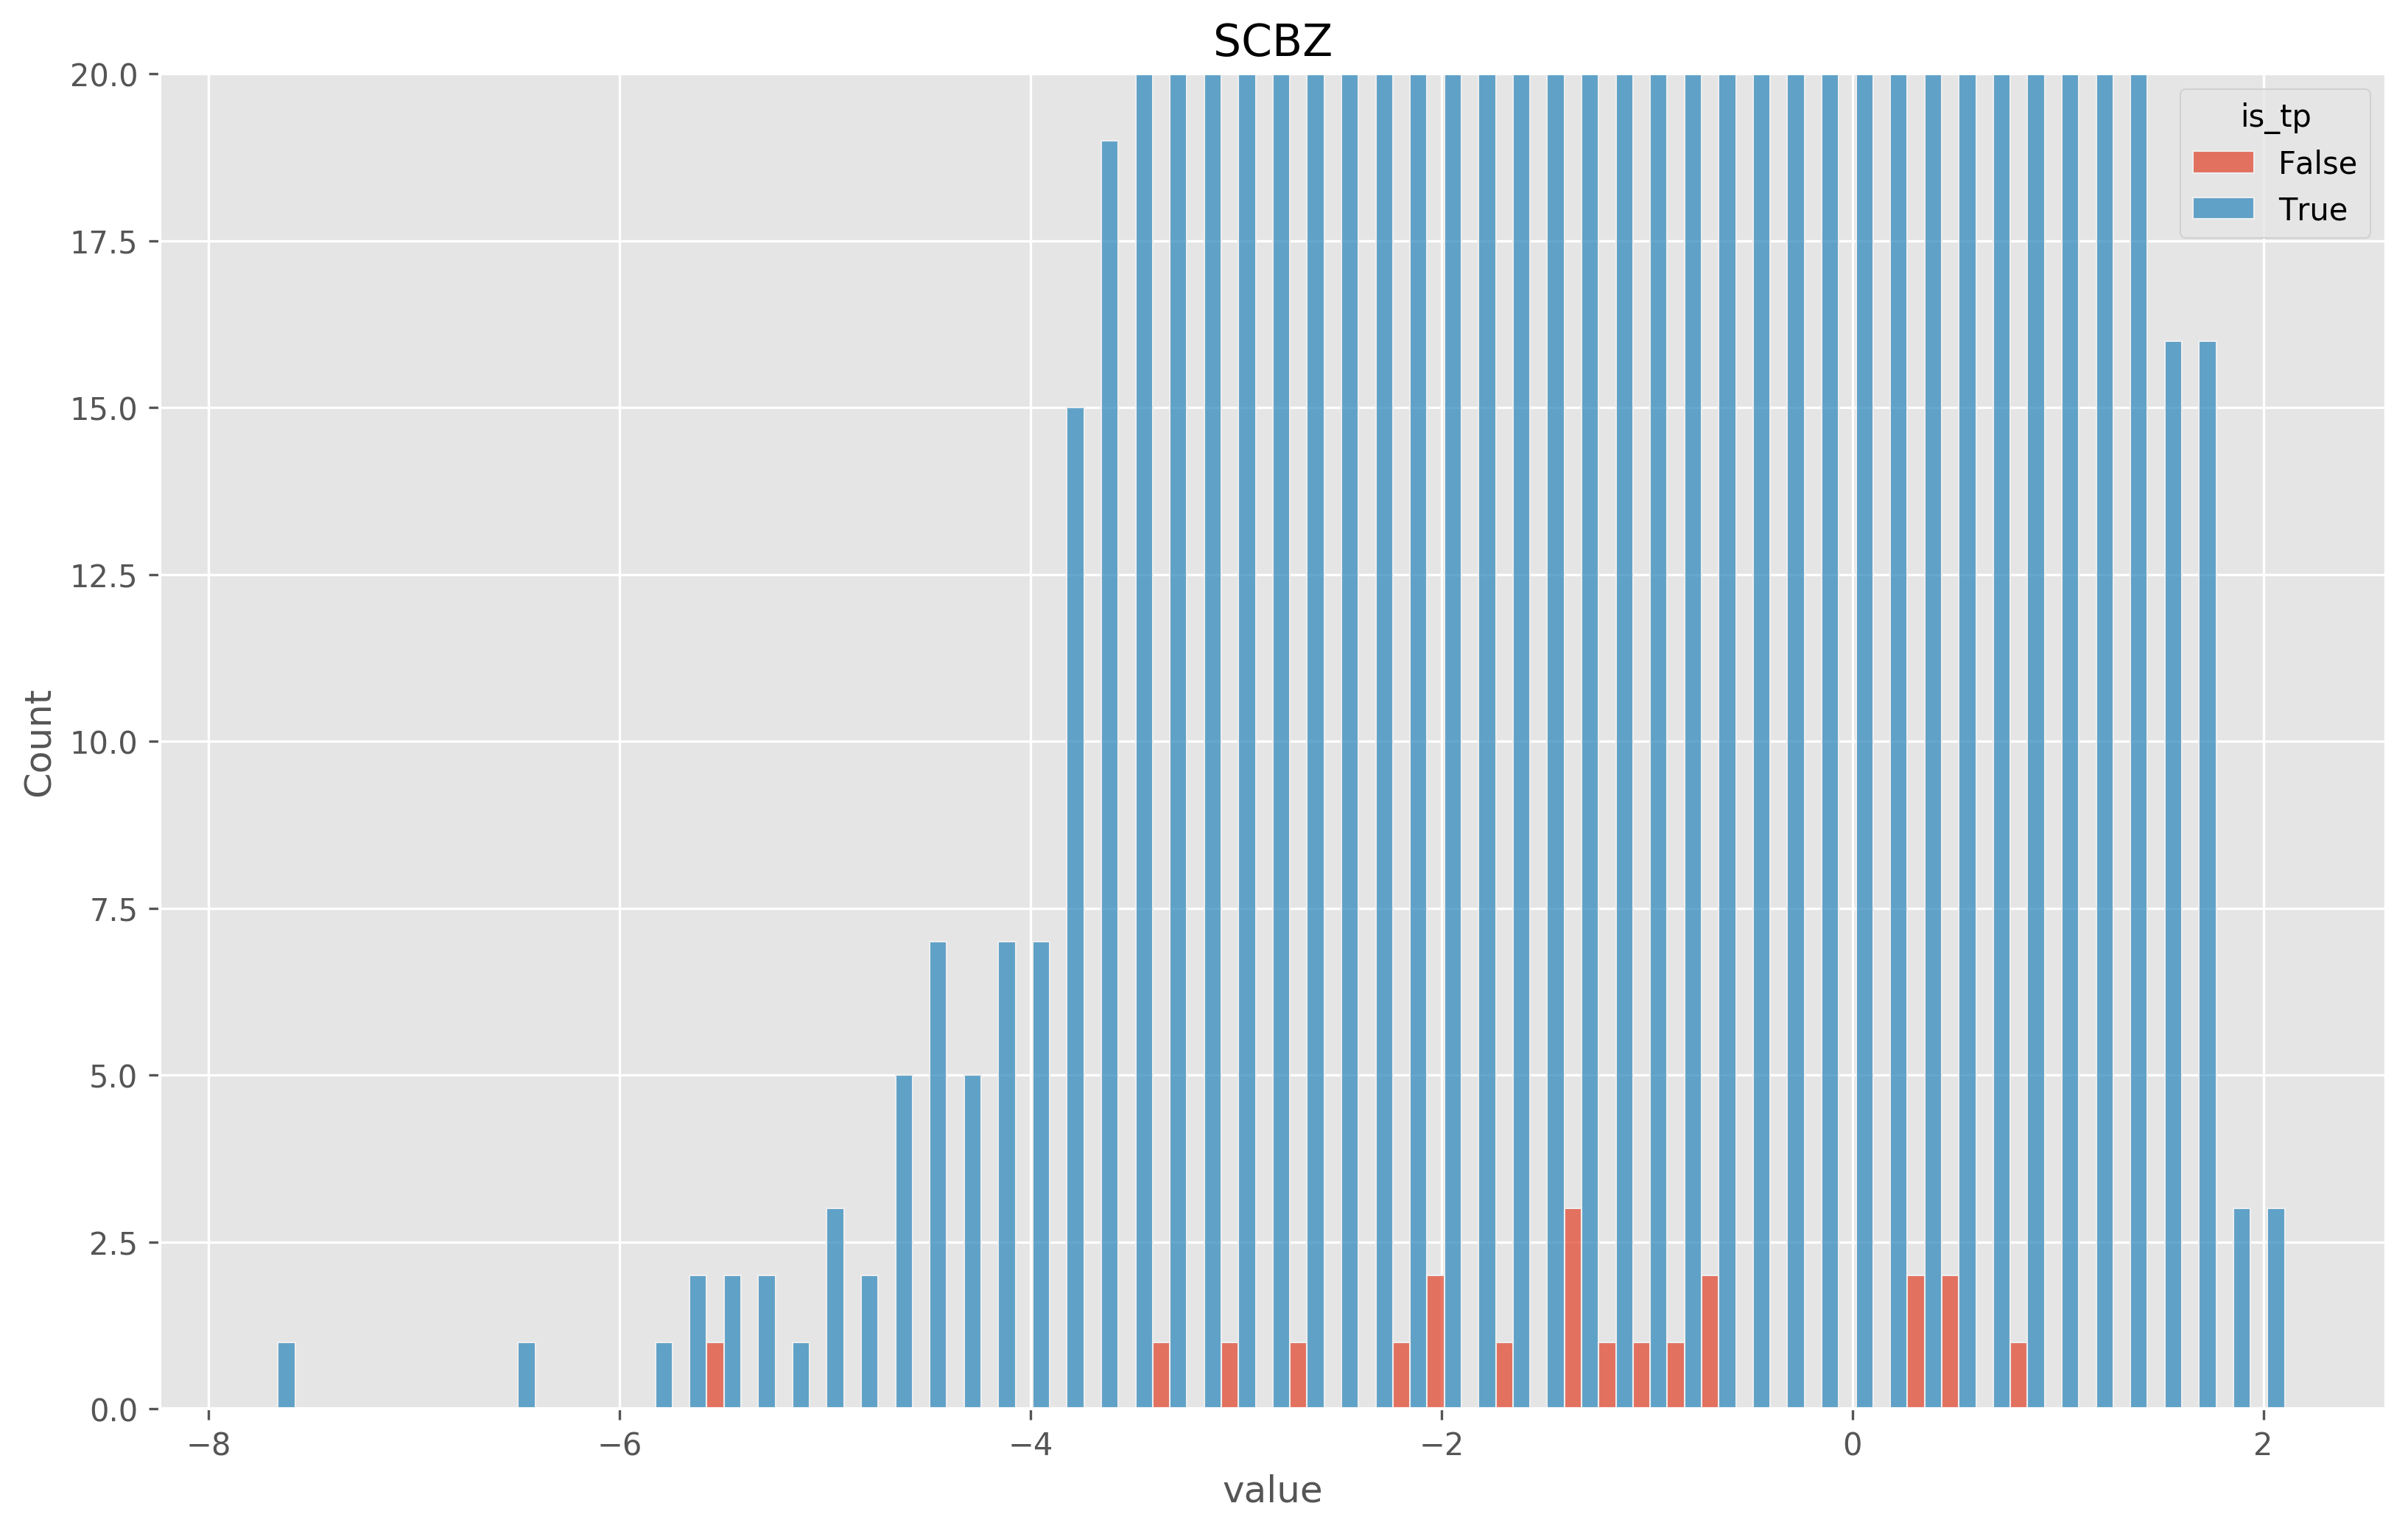

In [626]:
fig, ax = plt.subplots(figsize=(13, 8), dpi=300)
# data = data=df.query("field==@field and value>1.9")
sns.histplot(data=data, x=y, hue=x, ax=ax, multiple="dodge",)
# sns.histplot(data=data, x=y, hue=x, ax=ax, multiple="dodge", stat="percent", common_norm=False)
# ax.set_xlim((2.1, 5))
ax.set_ylim((0, 20))
# sns.violinplot(data=data, x=x, y=y, ax=ax)
ax.set_title(field)

In [627]:
fig, ax = plt.subplots(figsize=(13, 8), dpi=300)
x = "is_tp"
y = "value"
field = info[7]
data = data=df.query("field==@field")
sns.violinplot(data=data, x=x, y=y, ax=ax, cut=0)
ax.set_title(field)

Text(0.5, 1.0, 'SGB')

Text(0.5, 1.0, 'SGB')

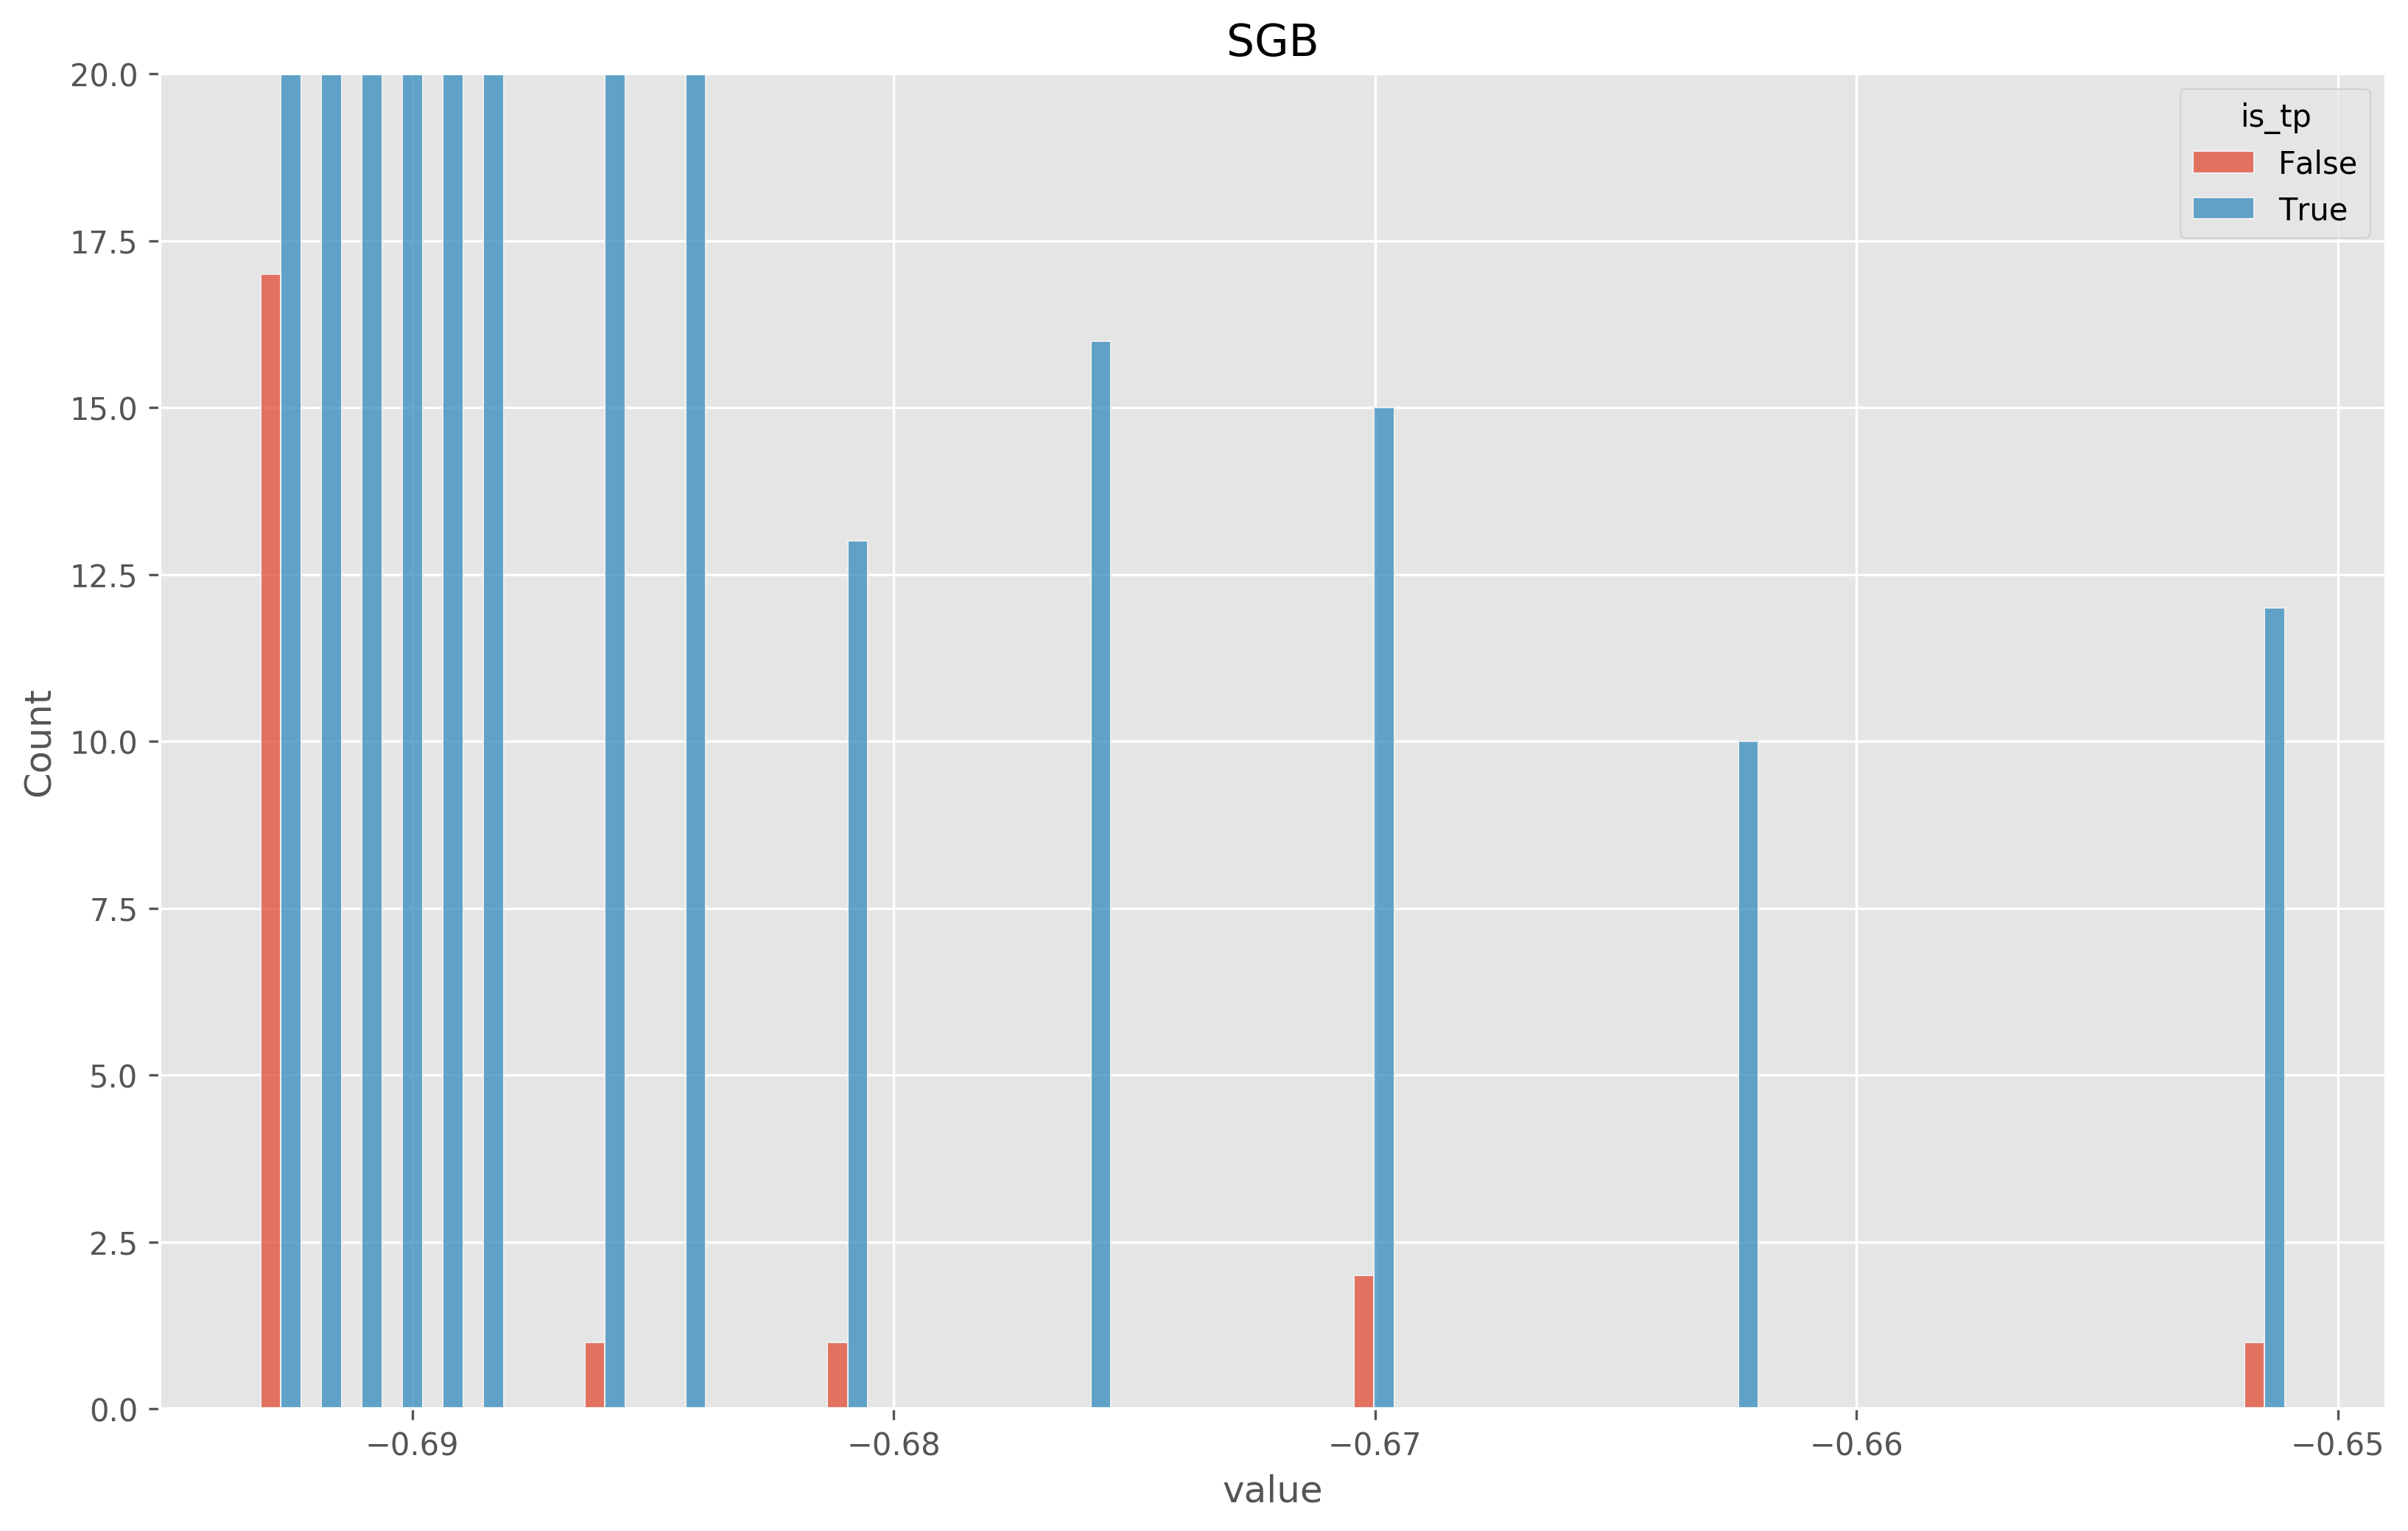

In [629]:
fig, ax = plt.subplots(figsize=(13, 8), dpi=300)
sns.histplot(data=data, x=y, hue=x, ax=ax, multiple="dodge", bins=50)
# sns.histplot(data=data, x=y, hue=x, ax=ax, multiple="dodge", stat="percent", common_norm=False)
ax.set(ylim=(0, 20))
ax.set_title(field)

In [630]:
fig, ax = plt.subplots(figsize=(13, 8), dpi=300)
x = "is_tp"
y = "value"
field = info[8]
data = data=df.query("field==@field")
sns.violinplot(data=data, x=x, y=y, ax=ax, cut=0)
ax.set_title(field)

Text(0.5, 1.0, 'VDB')

Text(0.5, 1.0, 'VDB')

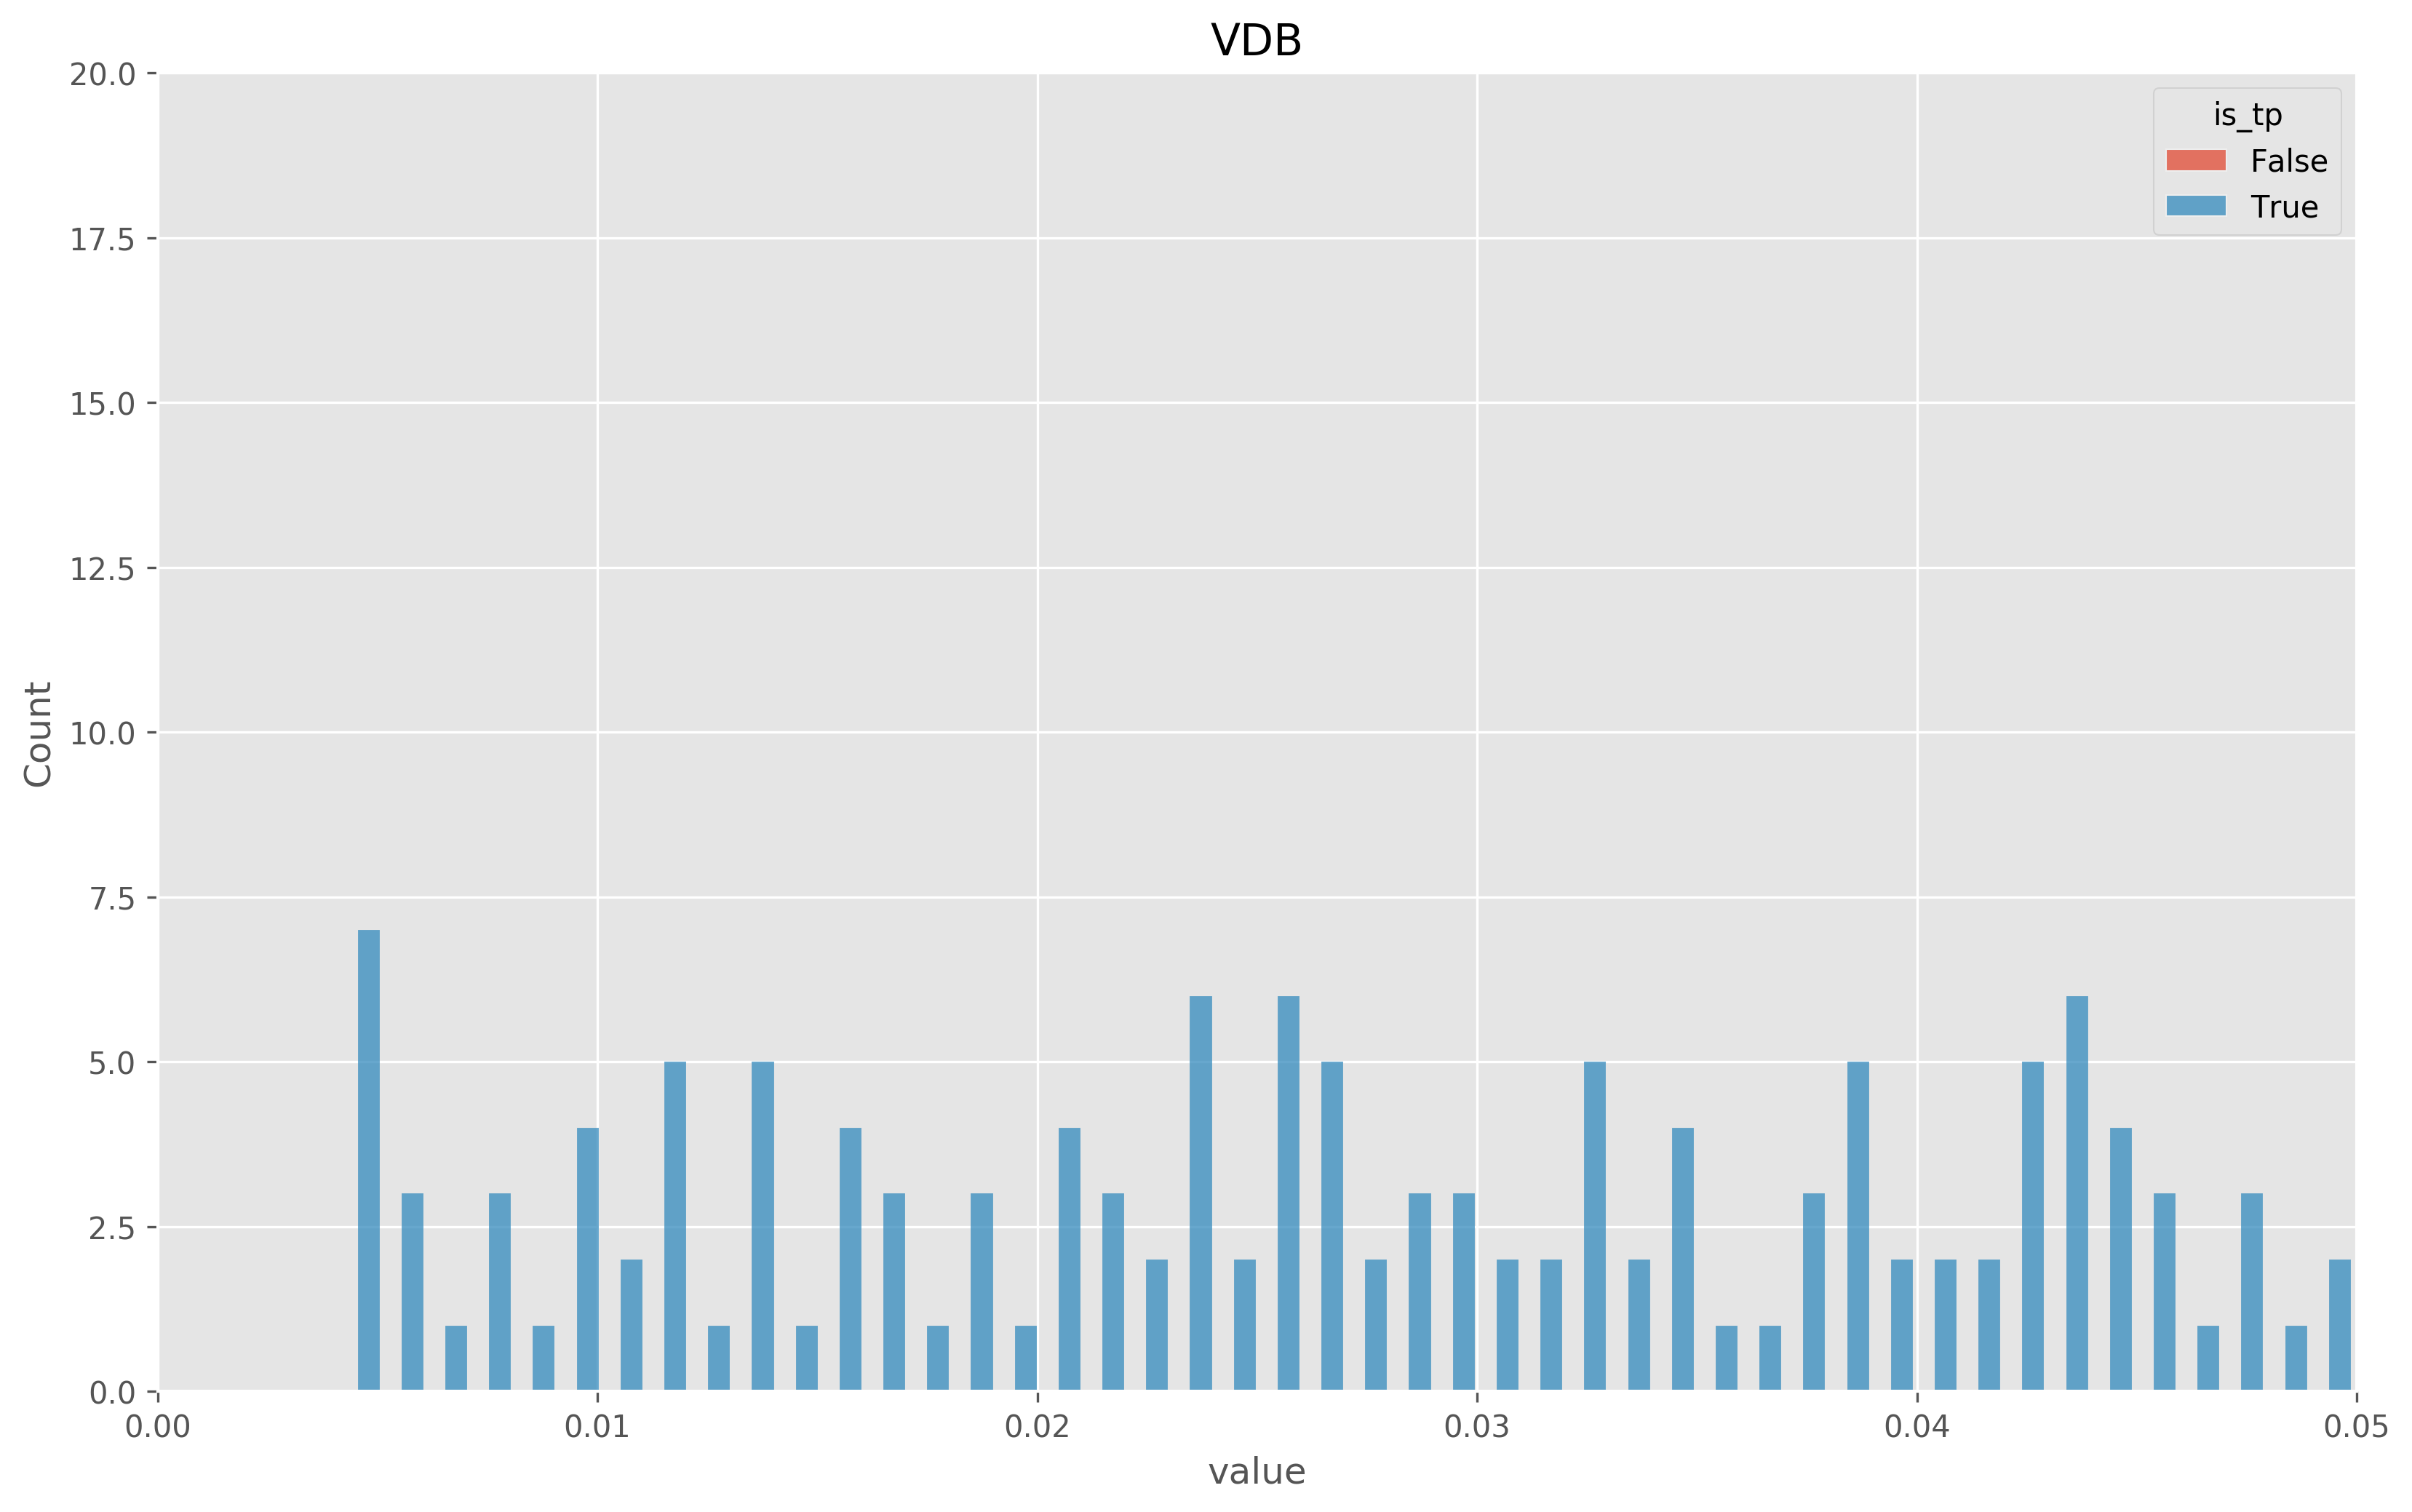

In [631]:
fig, ax = plt.subplots(figsize=(13, 8), dpi=300)
sns.histplot(data=data, x=y, hue=x, ax=ax, multiple="dodge", bins=1000)
# sns.histplot(data=data, x=y, hue=x, ax=ax, multiple="dodge", stat="percent", common_norm=False)
ax.set_xlim((0, 0.05))
ax.set_ylim((0, 20))
# sns.violinplot(data=data, x=x, y=y, ax=ax)
ax.set_title(field)

In [632]:
fig, ax = plt.subplots(figsize=(13, 8), dpi=300)
x = "is_tp"
y = "value"
field = info[9]
data = df.query("field==@field")
sns.violinplot(data=data, x=x, y=y, ax=ax, cut=0)
ax.set_title(field)

Text(0.5, 1.0, 'MQBZ')

Text(0.5, 1.0, 'MQBZ')

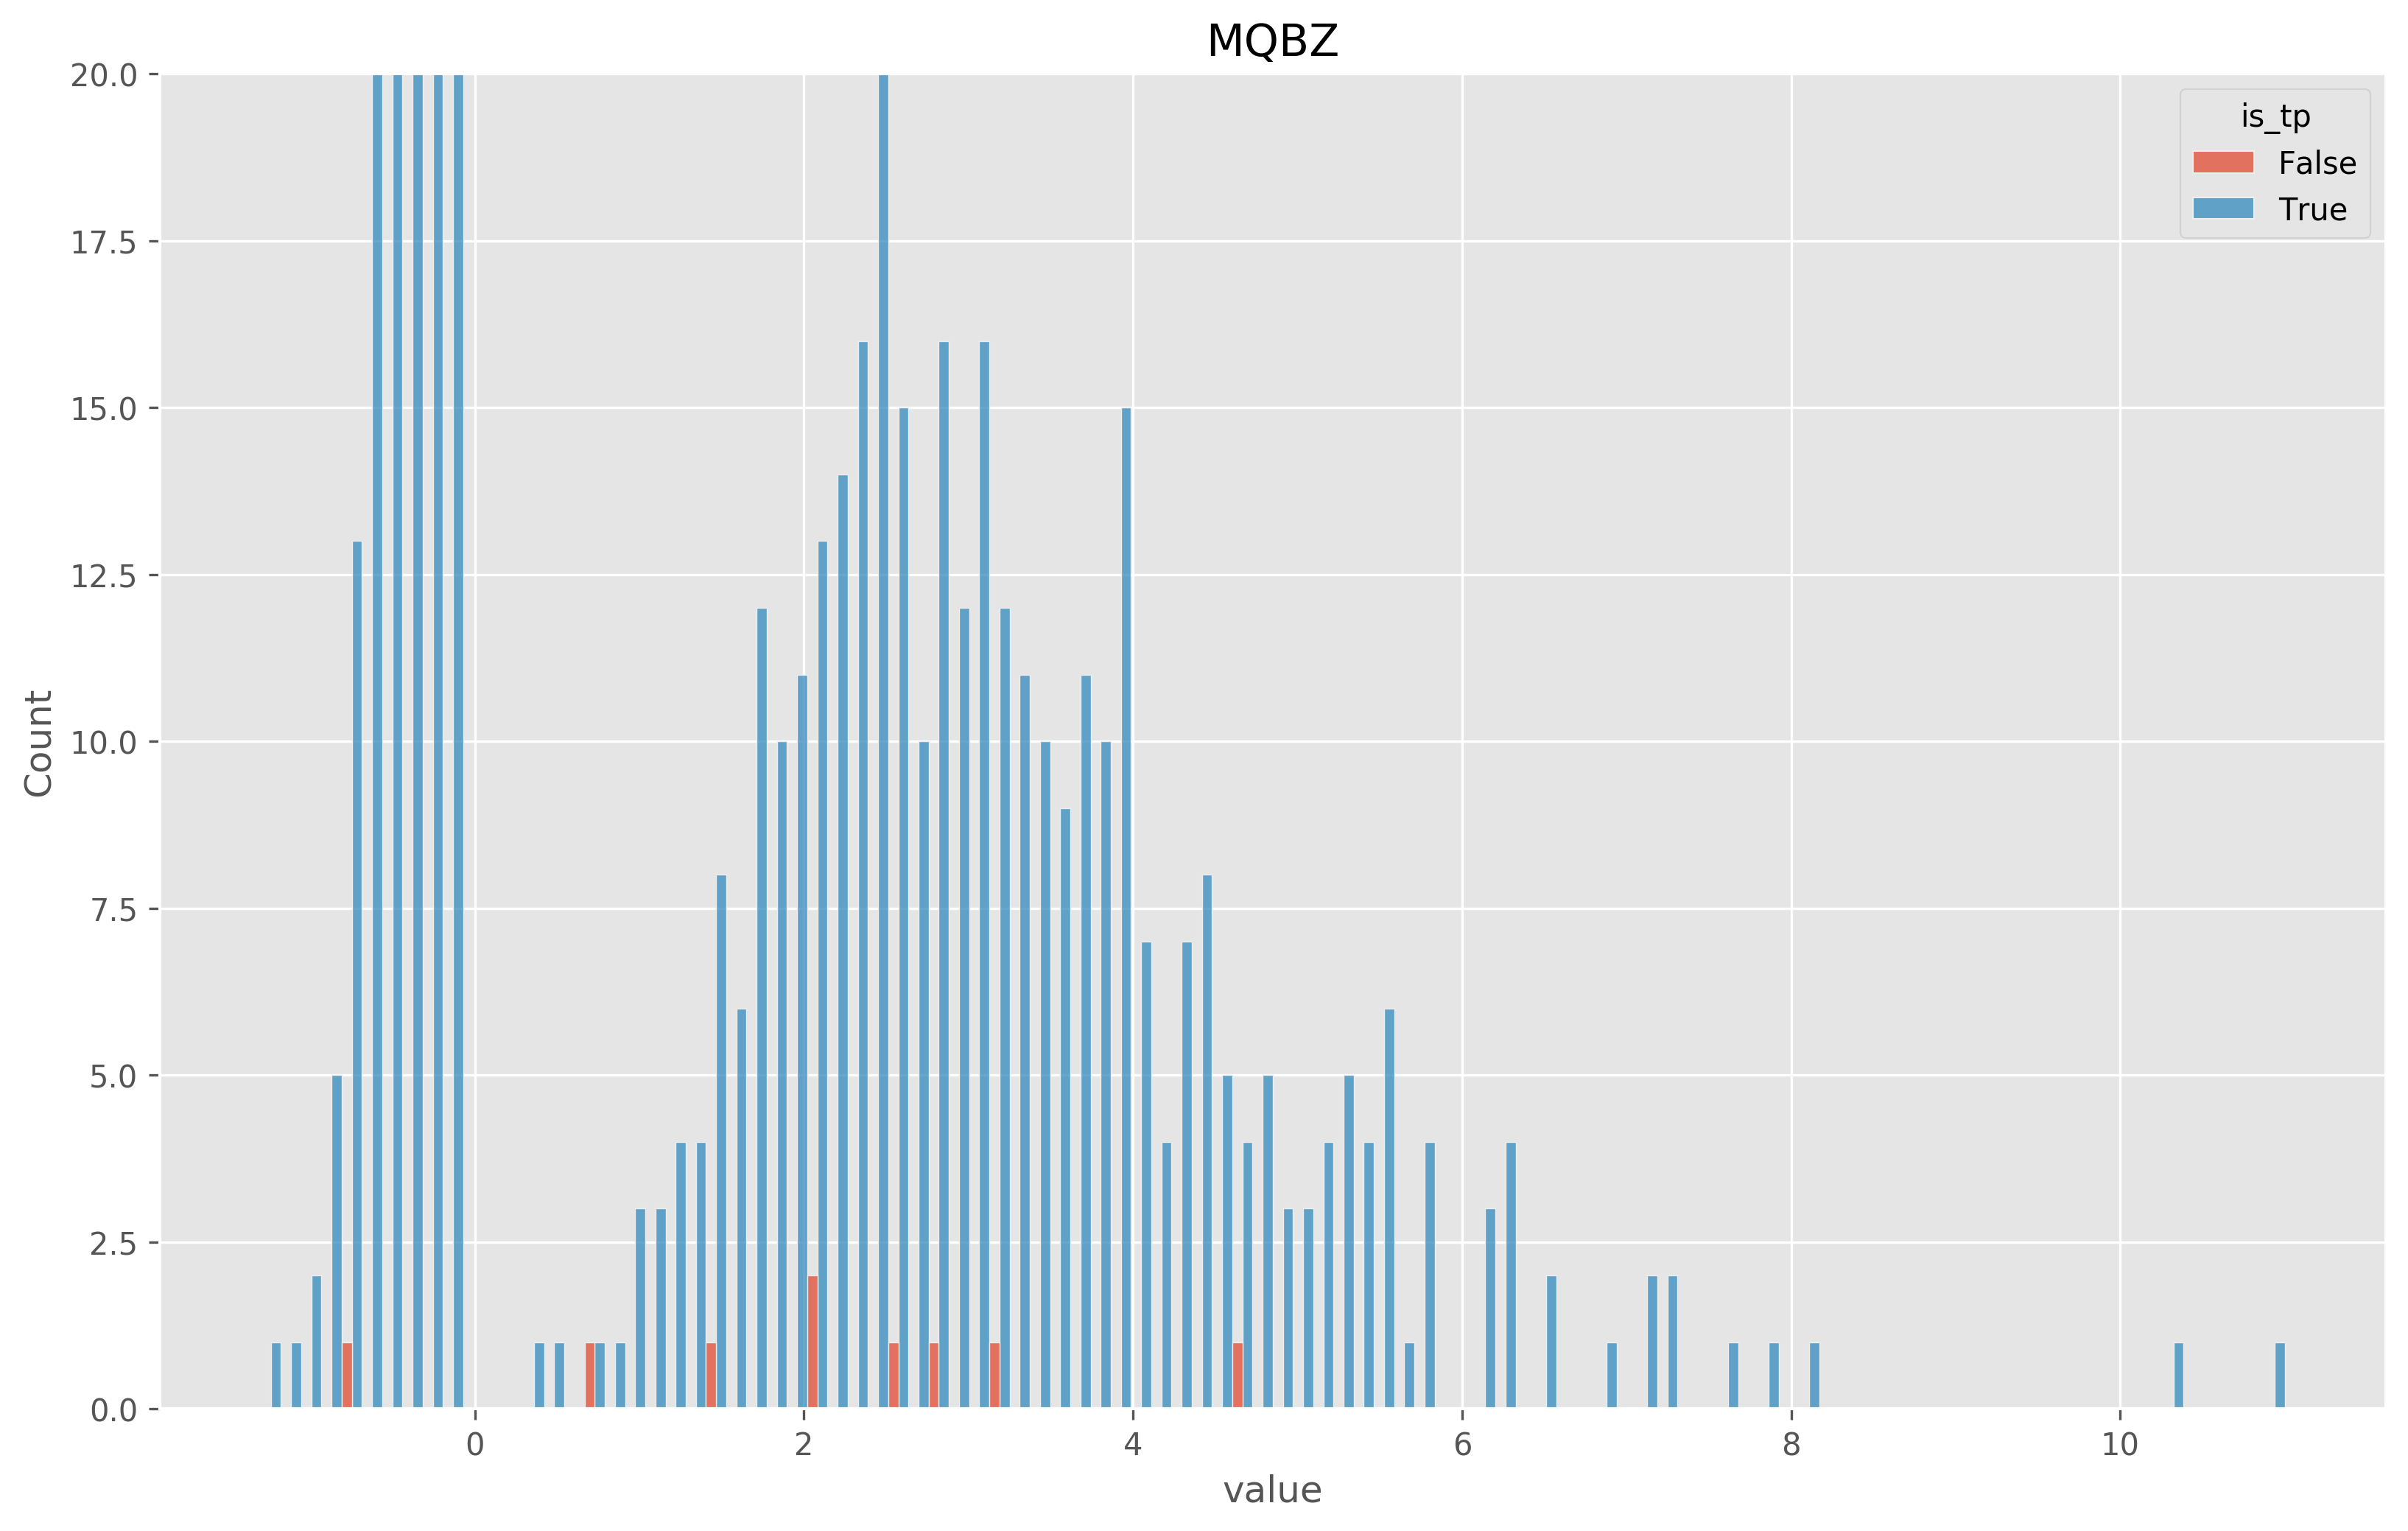

In [634]:
fig, ax = plt.subplots(figsize=(13, 8), dpi=300)
sns.histplot(data=data, x=y, hue=x, ax=ax, multiple="dodge", bins=100)
# sns.histplot(data=data, x=y, hue=x, ax=ax, multiple="dodge", stat="percent", common_norm=False)
# ax.set_xlim((0, 0.0005))
ax.set_ylim((0, 20))
# sns.violinplot(data=data, x=x, y=y, ax=ax)
ax.set_title(field)

In [683]:
f = "SGB"
vs = np.linspace(-0.7, -0.652, num=10)
xs = []
for v in vs:
    print(v)
#     print(df.query("field==@f and value<@v").groupby(["is_tp"]).count()["sample"])
    fps, tps = df.query("field==@f and value>@v").groupby(["is_tp"]).count()["sample"]
    p=fps/(fps+tps)
    xs.append(p)
    print(f"{fps} / {fps} + {tps} = {p}")


-0.7
22 / 22 + 8170 = 0.002685546875
-0.6946666666666667
22 / 22 + 8170 = 0.002685546875
-0.6893333333333334
5 / 5 + 213 = 0.022935779816513763
-0.6839999999999999
4 / 4 + 94 = 0.04081632653061224
-0.6786666666666666
3 / 3 + 53 = 0.05357142857142857
-0.6733333333333333
3 / 3 + 37 = 0.075
-0.668
1 / 1 + 22 = 0.043478260869565216
-0.6626666666666667
1 / 1 + 22 = 0.043478260869565216
-0.6573333333333333
1 / 1 + 12 = 0.07692307692307693
-0.652
1 / 1 + 12 = 0.07692307692307693


/home/michael/.pyenv/versions/3.8.2/envs/head_to_head_pipeline/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'FRS')]

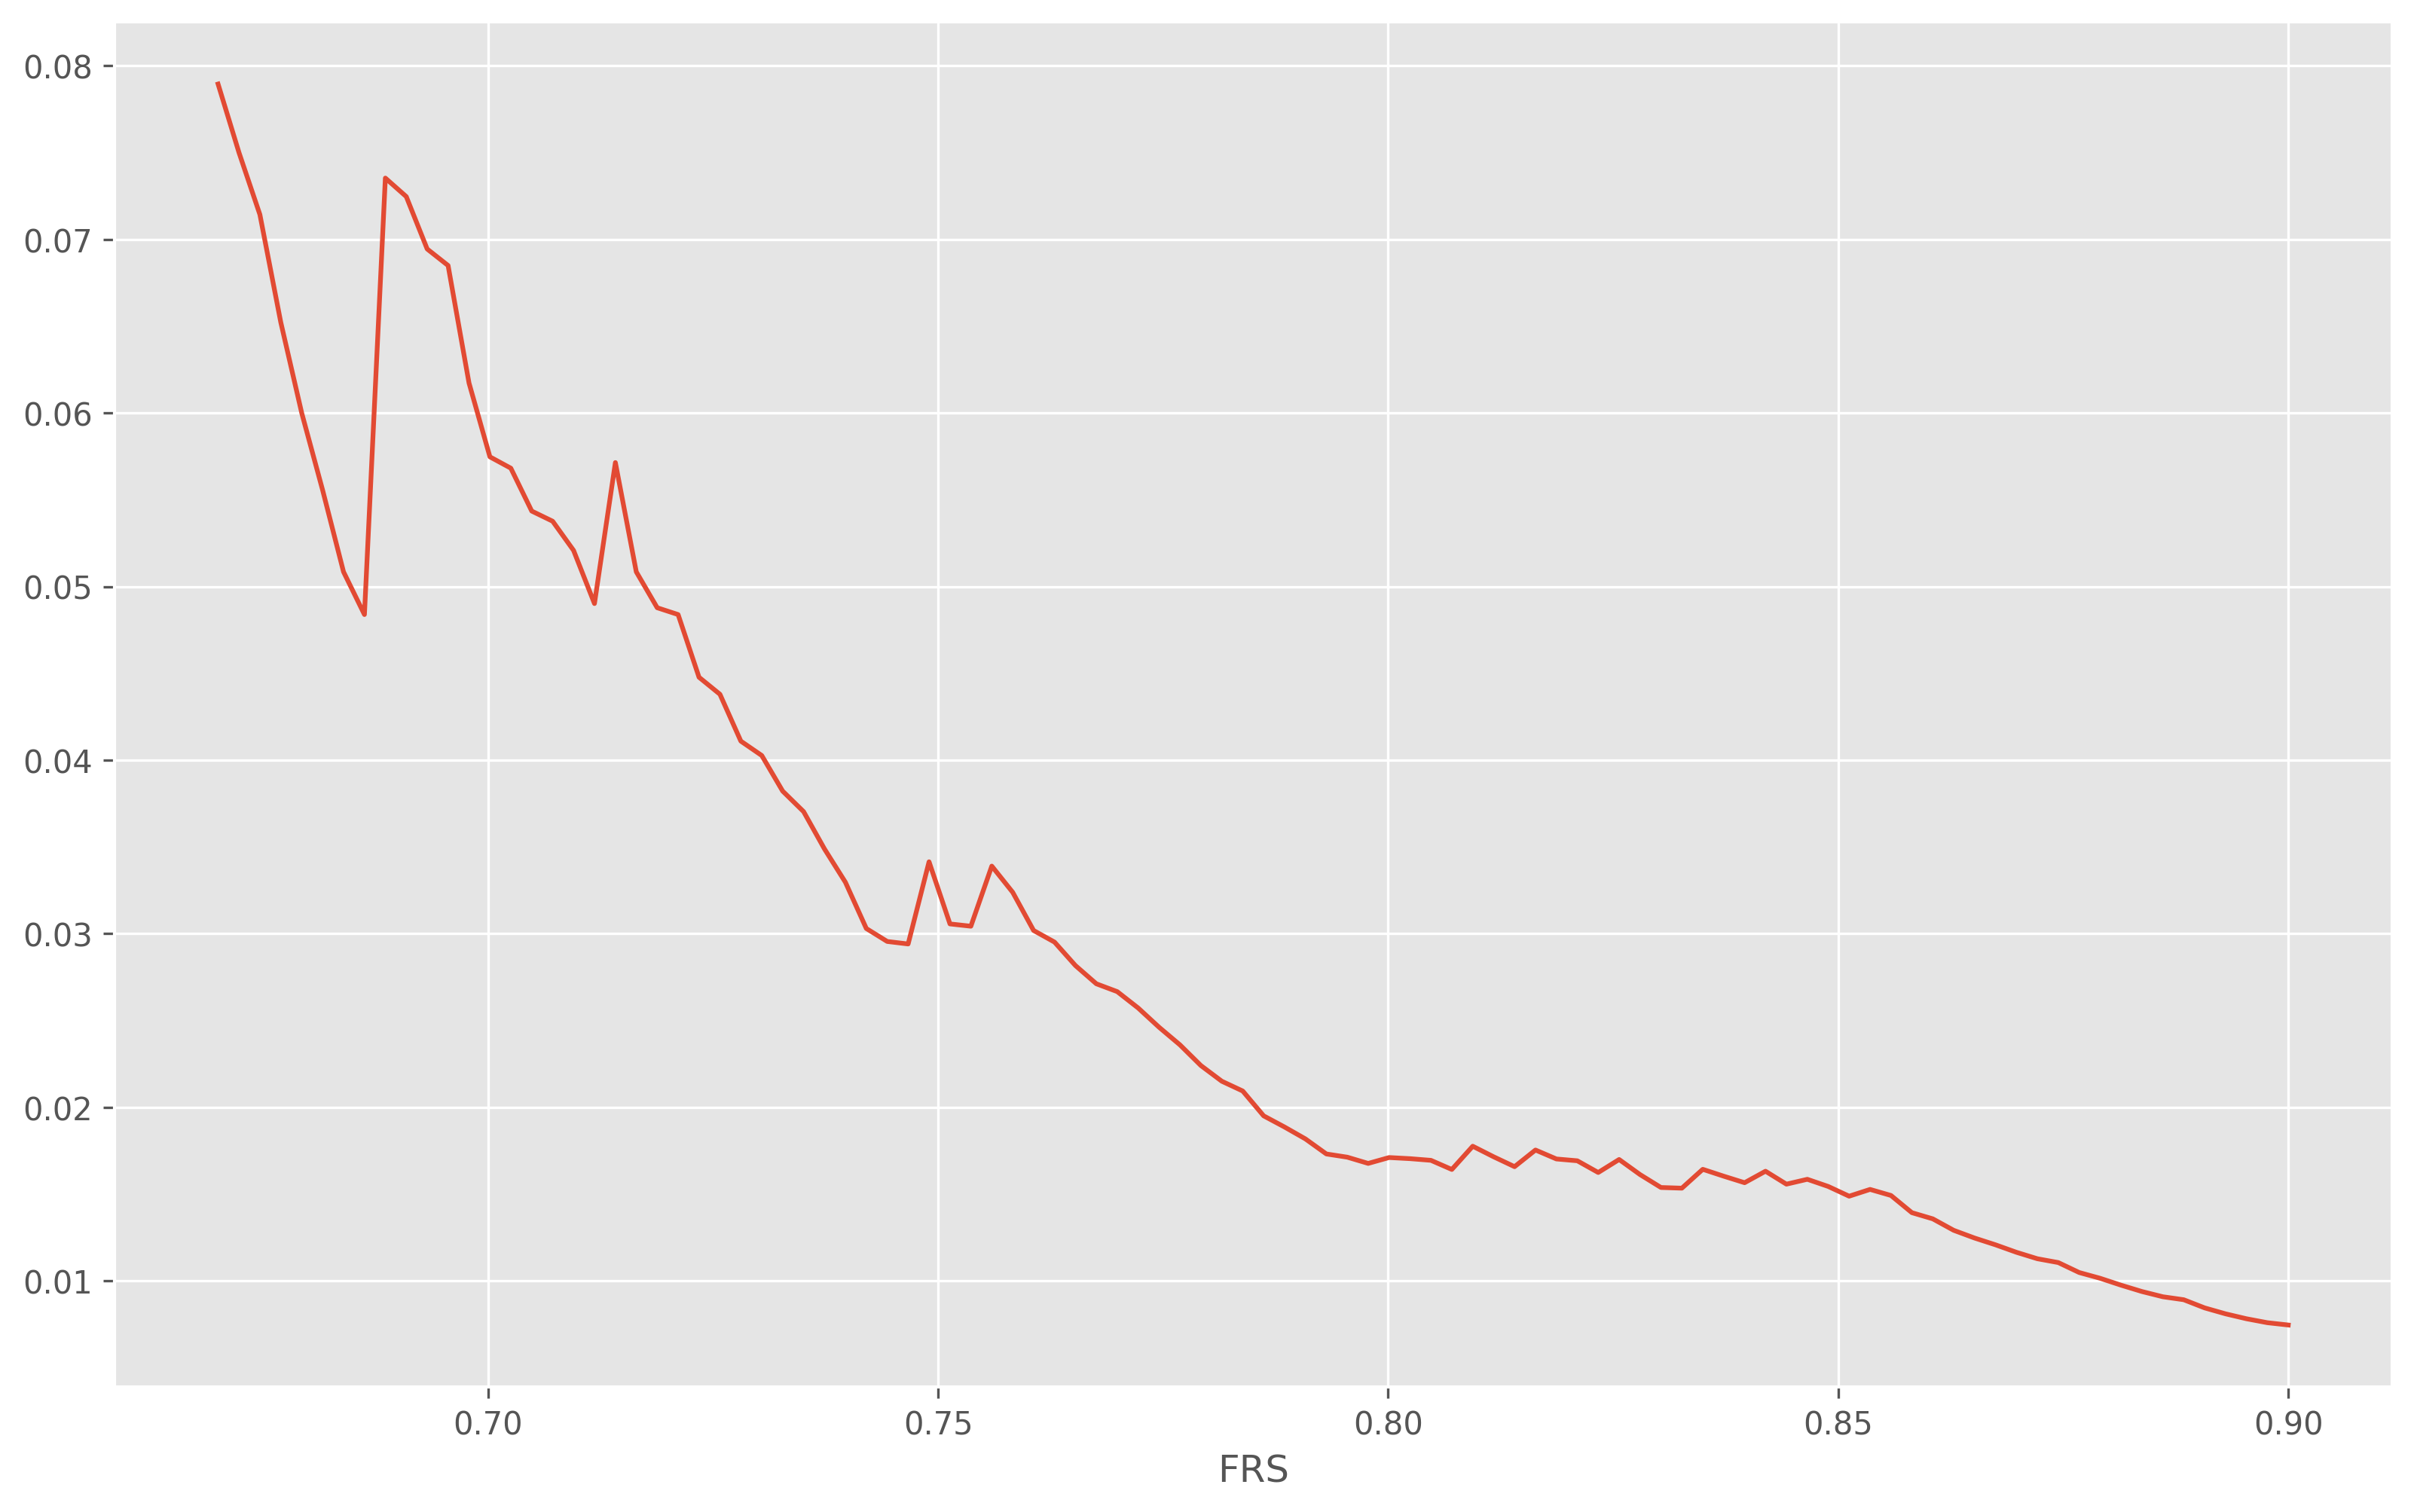

In [668]:
fig, ax = plt.subplots(figsize=(13, 8), dpi=300)
sns.lineplot(vs, xs, ax=ax,)
ax.set(xlabel=f)

In [337]:
f, t = df.query("field==@f and value<@v").groupby(["is_tp"]).count()

In [338]:
f

47

In [677]:
df.query("field=='FRS' and value <0.67").sort_values(by="value")

sample  is_tp field     value      POS
60181   mada_116   True   FRS  0.650000   283614
44517   mada_130   True   FRS  0.650000    30943
18036   mada_104   True   FRS  0.650000  3718357
19590   mada_104   True   FRS  0.650000  4101018
85366   mada_125   True   FRS  0.651163  3542219
94936   mada_102   True   FRS  0.652174  2888201
19648   mada_104   True   FRS  0.652174  4112429
5693    mada_104   True   FRS  0.653846  1063765
15824   mada_104   True   FRS  0.653846  3170828
63556   mada_116   True   FRS  0.655172  1212663
45434   mada_130   True   FRS  0.655172   386013
16516   mada_104   True   FRS  0.655172  3343007
8552    mada_104   True   FRS  0.655172  1640442
52386   mada_130   True   FRS  0.659091  3718357
43889  mada_1-44   True   FRS  0.661538  4359165
36755  mada_1-44   True   FRS  0.662791  2888201
89045   mada_102   True   FRS  0.663793   206339
20056   mada_104   True   FRS  0.666667  4187063
87602   mada_125   True   FRS  0.666667  4231865
5669    mada_104   True   FRS  0.666667  1061386
82632   mada_125   True   FRS  0.666667  2566768
71064   mada_116   True   FRS  0.666667  3636991
68986   mada_116   True   FRS  0.666667  2881569
64389   mada_116   True   FRS  0.666667  1457144
63595   mada_116  False   FRS  0.666667  1212750
62681   mada_116   True   FRS  0.666667   993346
62013   mada_116   True   FRS  0.666667   836332
17136   mada_104   True   FRS  0.666667  3498418
15670   mada_104   True   FRS  0.666667  3112877
58027   mada_132   True   FRS  0.666667  3547027
55319   mada_132   True   FRS  0.666667   993346
47176   mada_130   True   FRS  0.666667  1092195
92177   mada_102  False   FRS  0.666667  1637090
45097   mada_130   True   FRS  0.666667   206339
31350  mada_1-44   True   FRS  0.666667  1814135
25402  mada_1-44   True   FRS  0.666667   630722
62037   mada_116  False   FRS  0.666667   836423
3983    mada_104   True   FRS  0.666667   704997